In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.decomposition import PCA

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# выводить все столбцы
pd.options.display.max_columns = None

In [8]:
# Загрузка данных
data = pd.read_excel('data/data_course_ML_classic.xlsx')

In [9]:
data.shape

(1001, 214)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [11]:
for col in data.columns:                       
    if data[col].dtype == np.float64:          
        data[col] = data[col].astype(np.float32)   

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float32(107), int64(107)
memory usage: 1.2 MB


In [13]:
for col in data.columns:                       
    if data[col].dtype == np.int64:          
        data[col] = data[col].astype(np.int32)   

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float32(107), int32(107)
memory usage: 836.9 KB


In [15]:
data.sample(3)

Unnamed: 0   IC50, mM    CC50, mM          SI  MaxAbsEStateIndex  \
74           74   6.764008    6.764008    1.000000          13.687185   
349         349   8.929339  992.148804  111.111115          10.954251   
345         345  34.424702   95.137352    2.763636           4.007098   

     MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
74        13.687185           0.010178       -1.493044  0.267494  21.531250   
349       10.954251           0.114163       -0.913743  0.650150  38.090908   
345        4.007098           0.439284        0.439284  0.726232  42.739132   

          MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
74   443.519989      412.272003  443.217651                  172   
349  302.369995      280.194000  302.151794                  118   
345  319.536987      282.240997  319.298737                  132   

     NumRadicalElectrons  MaxPartialCharge  MinPartialCharge  \
74                     0          0.194116         -0.507053   
349                    0          0.149560         -0.389661   
345                    0          0.050666         -0.312685   

     MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  \
74              0.507053             0.194116          1.187500   
349             0.389661             0.149560          1.409091   
345             0.312685             0.050666          1.086957   

     FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  BCUT2D_MWLOW  \
74           1.812500          2.375000    16.493425      9.696378   
349          2.181818          2.909091    16.516764      9.702239   
345          1.652174          2.173913    15.403017      9.596355   

     BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  BCUT2D_LOGPLOW  BCUT2D_MRHI  \
74       2.558060     -2.300492       2.569998       -2.446234     6.309195   
349      2.491917     -2.490214       2.458365       -2.545361     5.744999   
345      2.583645     -2.666749       2.482756       -2.784783     5.130187   

     BCUT2D_MRLOW    AvgIpc  BalabanJ      BertzCT       Chi0      Chi0n  \
74      -0.886812  2.989045  2.121457  1112.221558  24.170843  19.673306   
349     -0.206085  2.501580  1.922646   604.859619  15.905413  12.898640   
345     -0.174685  2.391791  1.491052   415.803131  16.664927  15.990439   

         Chi0v       Chi1      Chi1n      Chi1v     Chi2n     Chi2v     Chi3n  \
74   19.673306  14.773616  10.632728  10.632728  9.288892  9.288892  6.723154   
349  12.898640  10.419852   7.698620   7.698620  6.673783  6.673783  5.005465   
345  15.990439  10.806098   9.621929   9.621929  9.563387  9.563387  6.330742   

        Chi3v     Chi4n     Chi4v  HallKierAlpha           Ipc     Kappa1  \
74   6.723154  4.155015  4.155015          -3.13  6.765492e+06  23.531384   
349  5.005465  3.617425  3.617425          -1.49  9.503752e+04  15.407394   
345  6.330742  5.712070  5.712070          -0.38  1.130265e+05  17.443270   

       Kappa2    Kappa3   LabuteASA  PEOE_VSA1  PEOE_VSA10  PEOE_VSA11  \
74   7.775867  3.386593  187.315735  24.749737   33.986141   17.349735   
349  5.612808  2.623530  129.972977  14.949918   12.390127    0.000000   
345  6.495244  3.670075  143.035583   5.316789    0.000000    0.000000   

     PEOE_VSA12  PEOE_VSA13  PEOE_VSA14  PEOE_VSA2  PEOE_VSA3  PEOE_VSA4  \
74          0.0         0.0         0.0  14.383612        0.0        0.0   
349         0.0         0.0         0.0   4.794537        0.0        0.0   
345         0.0         0.0         0.0   9.799819        0.0        0.0   

     PEOE_VSA5  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  PEOE_VSA9   SMR_VSA1  \
74         0.0   0.000000  34.618687  17.336512  44.866169  33.816559   
349        0.0  24.275122  37.471218  17.902180  17.808983  19.744455   
345        0.0  32.420338  45.572601  43.050846   6.668691   0.000000   

     SMR_VSA10  SMR_VSA2   SMR_VSA3   SMR_VSA4   SMR_VSA5   SMR_VSA6  \
74   17.349735       0.0   5.316789   0.000000  40.033676  33.729614   
349   6.286160      

In [16]:
# Проверка на дубликаты
data.duplicated().sum()

np.int64(0)

In [17]:
data.head()

Unnamed: 0    IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482376  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808777  161.142319   0.720000           2.627117   
3           3    1.705624  107.855652  63.235294           5.097360   
4           4  107.131531  139.270996   1.300000           5.150510   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0        5.094096           0.387225        0.387225  0.417362  42.928570   
1        3.961417           0.533868        0.533868  0.462473  45.214287   
2        2.627117           0.543231        0.543231  0.260923  42.187500   
3        5.097360           0.390603        0.390603  0.377845  41.862068   
4        5.150510           0.270476        0.270476  0.429038  36.514286   

        MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  384.652008      340.299988  384.350464                  158   
1  388.683990      340.299988  388.381744                  162   
2  446.808014      388.343994  446.458893                  186   
3  398.678986      352.311005  398.366089                  164   
4  466.713013      424.377014  466.334808                  184   

   NumRadicalElectrons  MaxPartialCharge  MinPartialCharge  \
0                    0          0.038844         -0.293526   
1                    0          0.012887         -0.313407   
2                    0          0.094802         -0.325573   
3                    0          0.038844         -0.293526   
4                    0          0.062897         -0.257239   

   MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  \
0             0.293526             0.038844          0.642857   
1             0.313407             0.012887          0.607143   
2             0.325573             0.094802          0.562500   
3             0.293526             0.038844          0.620690   
4             0.257239             0.062897          0.600000   

   FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  BCUT2D_MWLOW  \
0          1.035714          1.321429    14.822266      9.700470   
1          1.000000          1.285714    14.975110      9.689226   
2          0.906250          1.156250    15.353937      9.681293   
3          1.000000          1.310345    14.821216      9.700498   
4          0.971429          1.257143    14.831112      9.700385   

   BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  BCUT2D_LOGPLOW  BCUT2D_MRHI  \
0      2.600532     -2.343082       2.644698       -2.322229     5.944519   
1      2.614066     -2.394690       2.658342       -2.444817     5.134527   
2      2.665274     -2.477203       2.679014       -2.565224     5.117188   
3      2.600529     -2.342885       2.644709       -2.322031     5.944501   
4      2.602486     -2.342009       2.648473       -2.318893     5.963448   

   BCUT2D_MRLOW    AvgIpc  BalabanJ      BertzCT       Chi0      Chi0n  \
0      0.193481  3.150503  1.164038   611.920288  20.208897  19.534409   
1      0.120322  3.150503  1.080362   516.780151  20.208897  19.794682   
2     -0.922902  3.214947  1.219066   643.620178  23.794682  23.689110   
3      0.193510  3.179270  1.120513   626.651367  20.916002  20.241516   
4      0.193687  3.337074  1.136678  1101.164307  24.639618  22.617678   

       Chi0v       Chi1      Chi1n      Chi1v      Chi2n      Chi2v  \
0  19.534409  13.127793  12.204226  12.204226  12.058078  12.058078   
1  19.794682  13.127793  12.595754  12.595754  12.648544  12.648544   
2  23.689110  14.595754  14.249004  14.249004  15.671216  15.671216   
3  20.241516  13.627793  12.704226  12.704226  12.411631  12.411631   
4  22.617678  16.526773  13.868825  13.868825  13.613701  13.613701   

       Chi3n      Chi3v      Chi4n      Chi4v  HallKierAlpha           Ipc  \
0  10.695991  10.695991   7.340247   7.340247          -0.66  2.187750e+06   
1  11.473090  11.473090   8.180905   8.180905       

In [18]:
data.info()  # информация о колонках и типах данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float32(107), int32(107)
memory usage: 836.9 KB


In [19]:
data.describe()  # статистика по числовым колонкам

Unnamed: 0     IC50, mM     CC50, mM            SI  MaxAbsEStateIndex  \
count  1001.000000  1001.000000  1001.000000   1001.000000        1001.000000   
mean    500.000000   222.805161   589.110718     72.508827          10.831637   
std     289.108111   402.169739   642.867493    684.482727           3.307505   
min       0.000000     0.003517     0.700808      0.011489           2.321942   
25%     250.000000    12.515396    99.999039      1.433333           9.252350   
50%     500.000000    46.585182   411.039337      3.846154          12.179236   
75%     750.000000   224.975922   894.089172     16.566668          13.167843   
max    1000.000000  4128.529297  4538.976074  15620.599609          15.933462   

       MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex          qed  \
count     1001.000000        1001.000000     1001.000000  1001.000000   
mean        10.831637           0.180681       -0.967237     0.580412   
std          3.307505           0.168710        1.588036     0.212230   
min          2.321942           0.000039       -6.992795     0.059567   
25%          9.252350           0.051073       -1.334487     0.442842   
50%         12.179236           0.124606       -0.419485     0.634981   
75%         13.167843           0.291020        0.061754     0.742483   
max         15.933462           1.374614        1.374614     0.947265   

               SPS        MolWt  HeavyAtomMolWt   ExactMolWt  \
count  1001.000000  1001.000000     1001.000000  1001.000000   
mean     29.487989   348.262238      324.468994   347.940582   
std      12.742749   126.946373      121.694130   126.807892   
min       9.416667   110.155998      100.075996   110.073166   
25%      18.486486   264.321014      244.212006   264.136169   
50%      29.290323   315.457001      293.183014   315.219818   
75%      38.750000   409.282990      385.257996   408.166077   
max      60.272728   904.776978      856.393005   904.248474   

       NumValenceElectrons  NumRadicalElectrons  MaxPartialCharge  \
count          1001.000000               1001.0        998.000000   
mean            132.115884                  0.0          0.235749   
std              46.701805                  0.0          0.129429   
min              42.000000                  0.0         -0.016706   
25%             102.000000                  0.0          0.118380   
50%             120.000000                  0.0          0.250661   
75%             152.000000                  0.0          0.335693   
max             350.000000                  0.0          0.572596   

       MinPartialCharge  MaxAbsPartialCharge  MinAbsPartialCharge  \
count        998.000000           998.000000           998.000000   
mean          -0.407436             0.415741             0.227534   
std            0.075974             0.071951             0.119641   
min           -0.744036             0.085007             0.002020   
25%           -0.477880             0.361390             0.116849   
50%           -0.393567             0.426056             0.250661   
75%           -0.354484             0.477880             0.330890   
max           -0.085007             0.744036             0.507387   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  \
count       1001.000000       1001.000000       1001.000000   998.000000   
mean           1.143163          1.824616          2.418739    23.196621   
std            0.241080          0.320613          0.396290    14.529014   
min            0.222222          0.377778          0.577778    14.513946   
25%            1.000000          1.634146          2.243902    16.366966   
50%            1.153846          1.880000          2.500000    16.564091   
75%            1.333333          2.050000          2.689655    32.092049   
max            1.750000          2.625000          3.266667   126.912704   

       BCUT2D_MWLOW  BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  \
count    998.000000    998.000000    998.000000 

In [20]:
# Проверка на пропуски
data.isnull().sum()

Unnamed: 0           0
IC50, mM             0
CC50, mM             0
SI                   0
MaxAbsEStateIndex    0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 214, dtype: int64

In [21]:
data = data.fillna(data.median())

In [22]:
if data.isnull().sum().sum() > 0:
    print('Есть пропущенные значения')

In [23]:
# Описательная статистика
data.describe()

Unnamed: 0     IC50, mM     CC50, mM            SI  MaxAbsEStateIndex  \
count  1001.000000  1001.000000  1001.000000   1001.000000        1001.000000   
mean    500.000000   222.805161   589.110718     72.508827          10.831637   
std     289.108111   402.169739   642.867493    684.482727           3.307505   
min       0.000000     0.003517     0.700808      0.011489           2.321942   
25%     250.000000    12.515396    99.999039      1.433333           9.252350   
50%     500.000000    46.585182   411.039337      3.846154          12.179236   
75%     750.000000   224.975922   894.089172     16.566668          13.167843   
max    1000.000000  4128.529297  4538.976074  15620.599609          15.933462   

       MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex          qed  \
count     1001.000000        1001.000000     1001.000000  1001.000000   
mean        10.831637           0.180681       -0.967237     0.580412   
std          3.307505           0.168710        1.588036     0.212230   
min          2.321942           0.000039       -6.992795     0.059567   
25%          9.252350           0.051073       -1.334487     0.442842   
50%         12.179236           0.124606       -0.419485     0.634981   
75%         13.167843           0.291020        0.061754     0.742483   
max         15.933462           1.374614        1.374614     0.947265   

               SPS        MolWt  HeavyAtomMolWt   ExactMolWt  \
count  1001.000000  1001.000000     1001.000000  1001.000000   
mean     29.487989   348.262238      324.468994   347.940582   
std      12.742749   126.946373      121.694130   126.807892   
min       9.416667   110.155998      100.075996   110.073166   
25%      18.486486   264.321014      244.212006   264.136169   
50%      29.290323   315.457001      293.183014   315.219818   
75%      38.750000   409.282990      385.257996   408.166077   
max      60.272728   904.776978      856.393005   904.248474   

       NumValenceElectrons  NumRadicalElectrons  MaxPartialCharge  \
count          1001.000000               1001.0       1001.000000   
mean            132.115884                  0.0          0.235794   
std              46.701805                  0.0          0.129237   
min              42.000000                  0.0         -0.016706   
25%             102.000000                  0.0          0.118381   
50%             120.000000                  0.0          0.250661   
75%             152.000000                  0.0          0.335693   
max             350.000000                  0.0          0.572596   

       MinPartialCharge  MaxAbsPartialCharge  MinAbsPartialCharge  \
count       1001.000000          1001.000000          1001.000000   
mean          -0.407395             0.415772             0.227603   
std            0.075863             0.071845             0.119468   
min           -0.744036             0.085007             0.002020   
25%           -0.477880             0.361390             0.118380   
50%           -0.393567             0.426056             0.250661   
75%           -0.354928             0.477880             0.330890   
max           -0.085007             0.744036             0.507387   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  \
count       1001.000000       1001.000000       1001.000000  1001.000000   
mean           1.143163          1.824616          2.418739    23.176743   
std            0.241080          0.320613          0.396290    14.511738   
min            0.222222          0.377778          0.577778    14.513946   
25%            1.000000          1.634146          2.243902    16.366966   
50%            1.153846          1.880000          2.500000    16.564091   
75%            1.333333          2.050000          2.689655    32.092049   
max            1.750000          2.625000          3.266667   126.912704   

       BCUT2D_MWLOW  BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  \
count   1001.000000   1001.000000   1001.000000 

In [24]:
data.shape

(1001, 214)

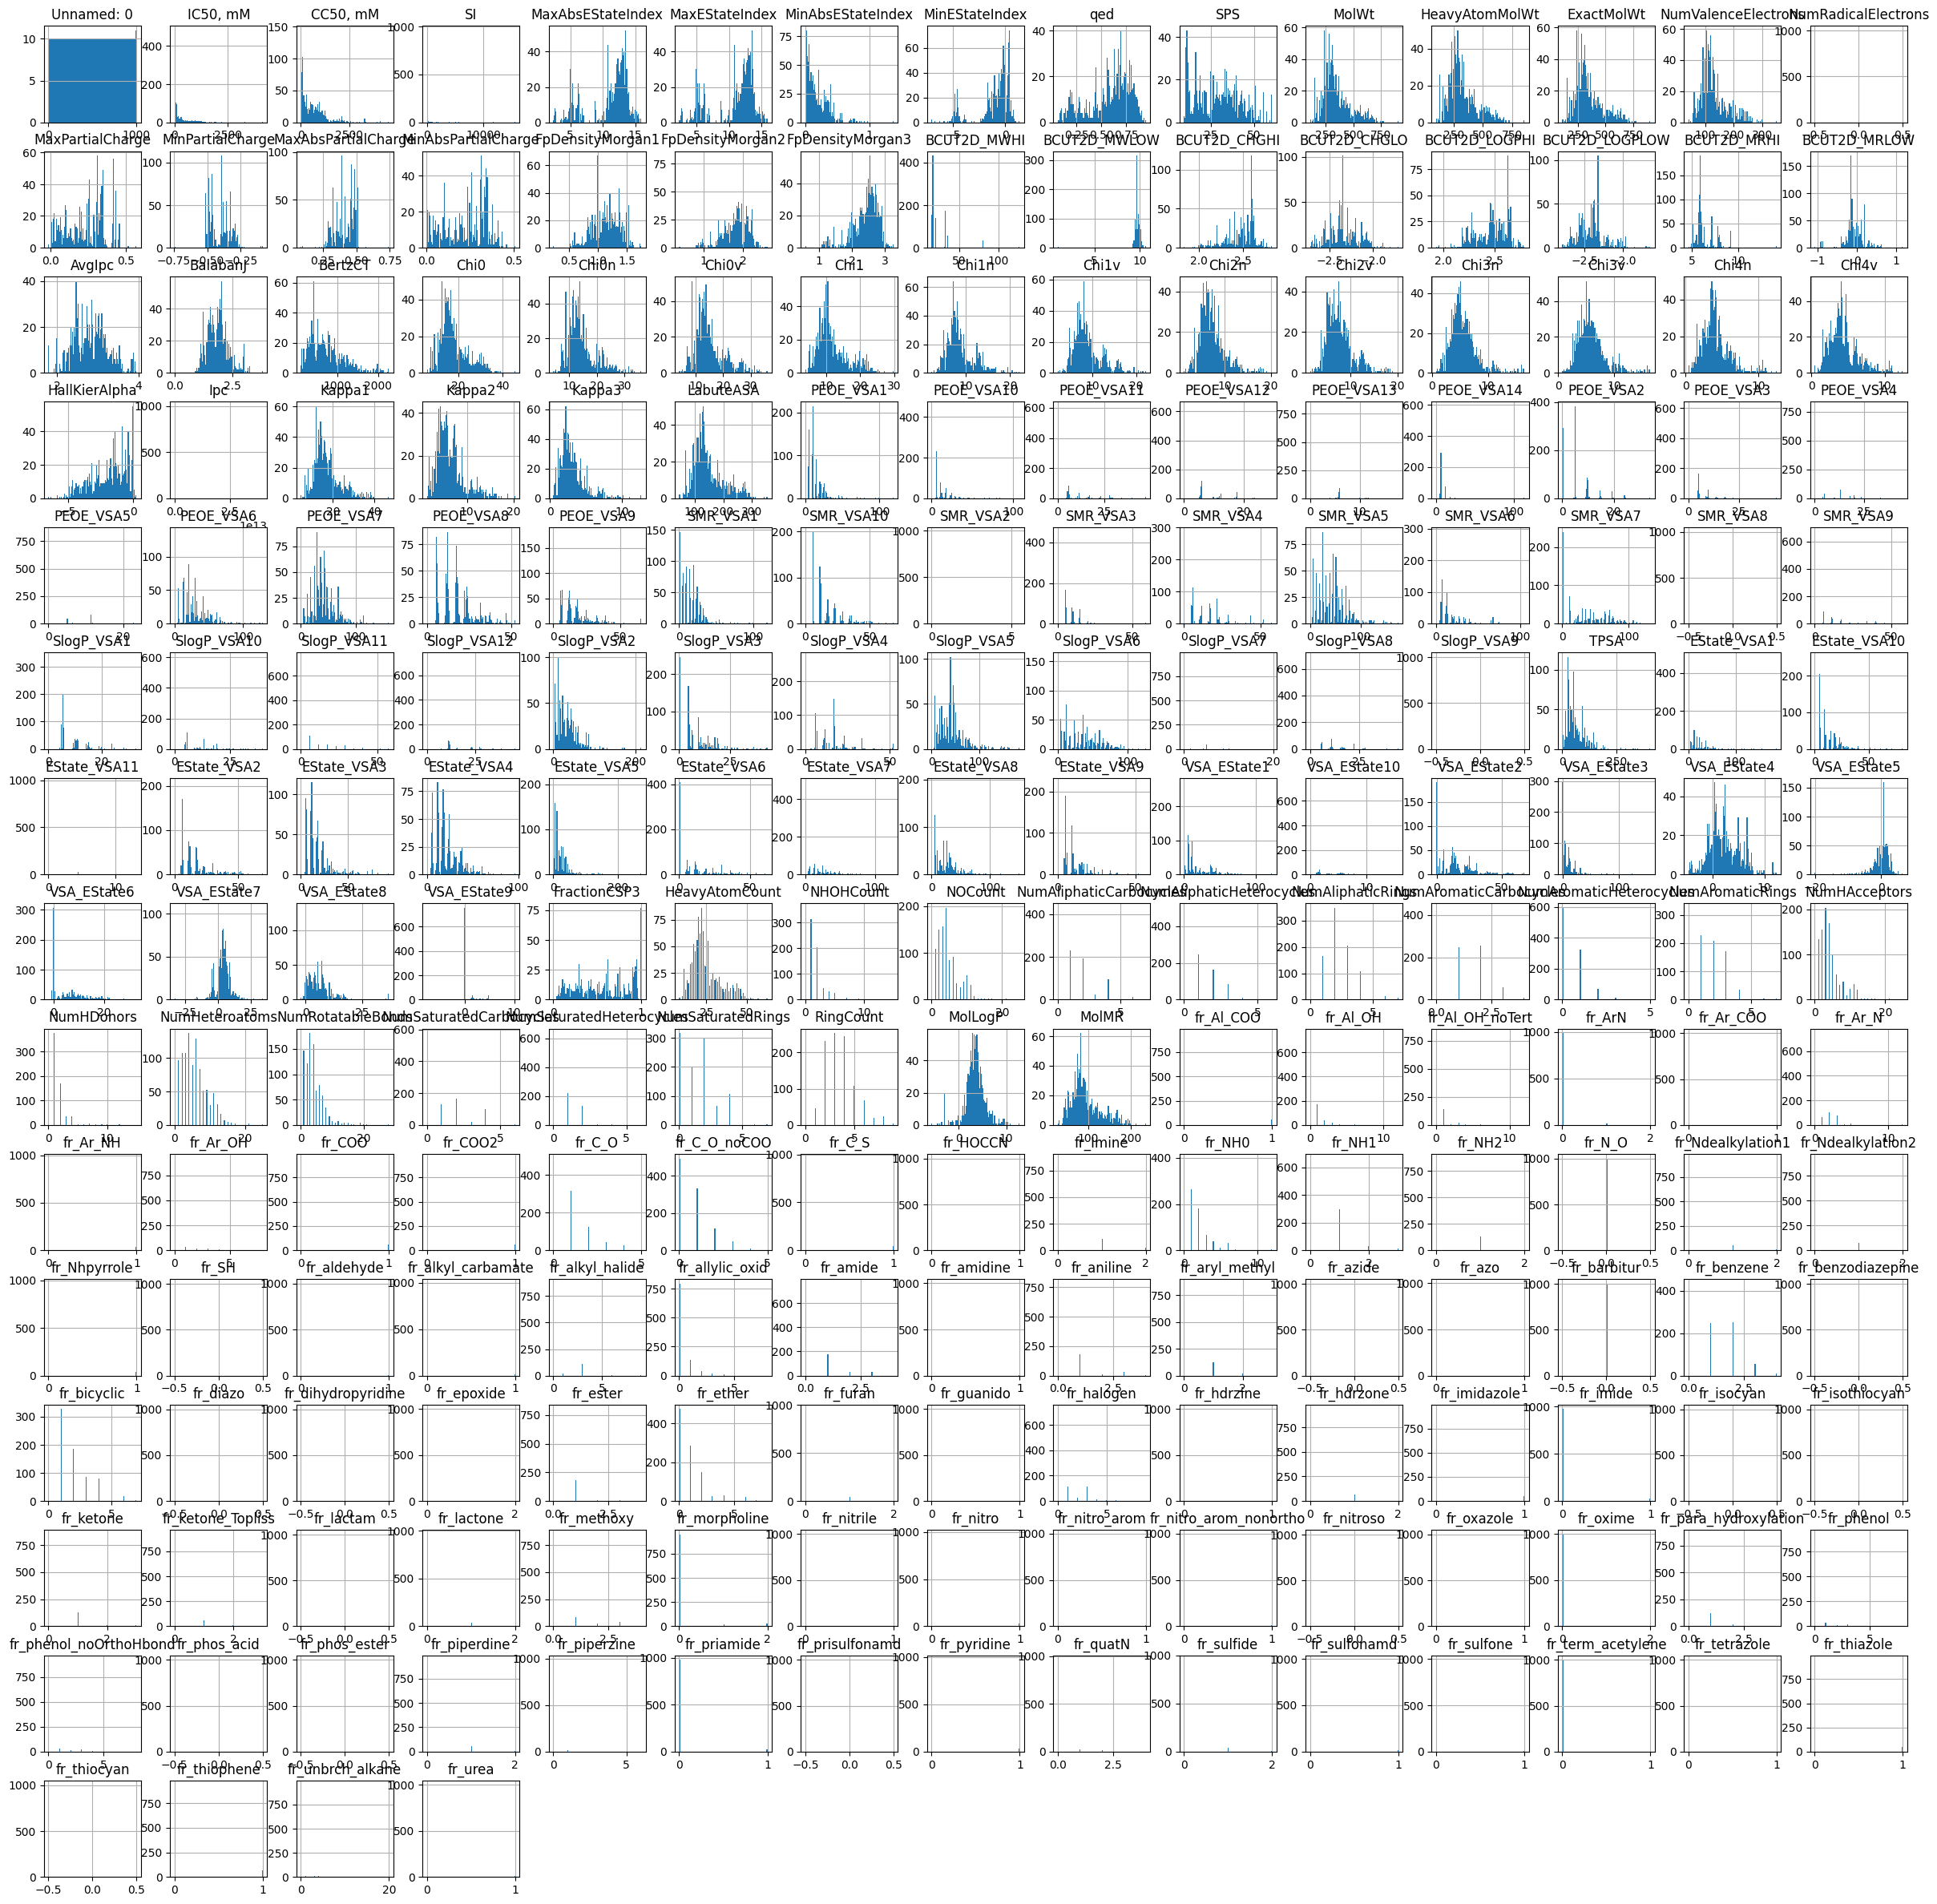

In [25]:
data.hist(bins=100, figsize=(30,30));

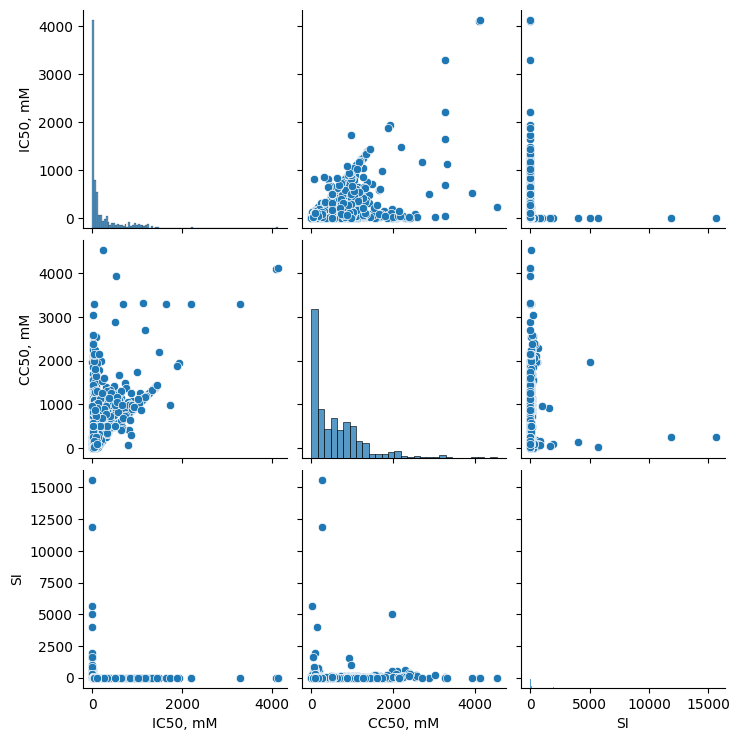

In [26]:
# Визуализация распределений
sns.pairplot(data[['IC50, mM', 'CC50, mM', 'SI']])
plt.show()

In [27]:
# Разделение на признаки и целевые переменные
X = data.drop(['IC50, mM', 'CC50, mM', 'SI'], axis=1)  # предполагаем, что остальные колонки - признаки
y_ic50 = data['IC50, mM']
y_cc50 = data['CC50, mM']
y_si = data['SI']

### Однофакторный анализ

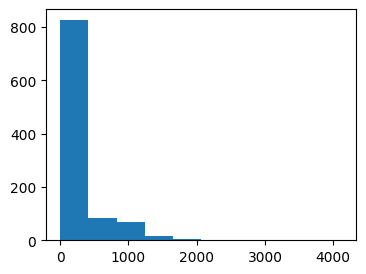

In [28]:
# Гистограмма 'IC50, mM'
plt.figure(figsize=(4,3))
plt.hist(y_ic50);

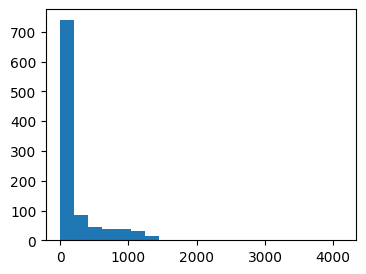

In [29]:
plt.figure(figsize=(4,3))

plt.hist(y_ic50, bins=20);

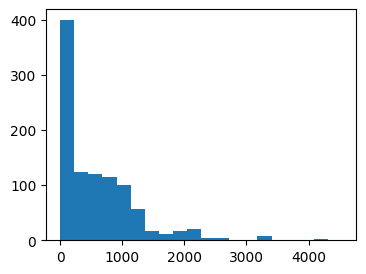

In [30]:
# Гистограмма 'IC50, mM'
plt.figure(figsize=(4,3))
plt.hist(y_cc50, bins=20);

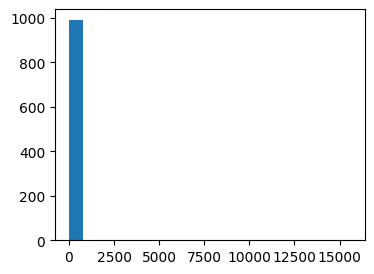

In [31]:
# Гистограмма 'IC50, mM'
plt.figure(figsize=(4,3))
plt.hist(y_si, bins=20);

В данных есть выбросы, распределения целевых показателей отличается от нормального

### Влияние 'IC50, mM' на 'SI'

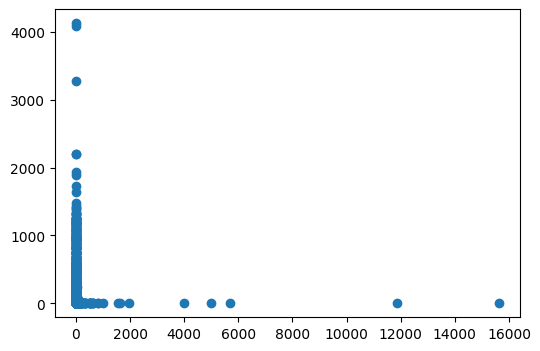

In [32]:
plt.figure(figsize=(6,4))

plt.scatter(y_si, y_ic50);

In [33]:
np.corrcoef(y_si, y_ic50)[0][1]

np.float64(-0.056603802814451515)

### Влияние 'CC50, mM' на 'SI'

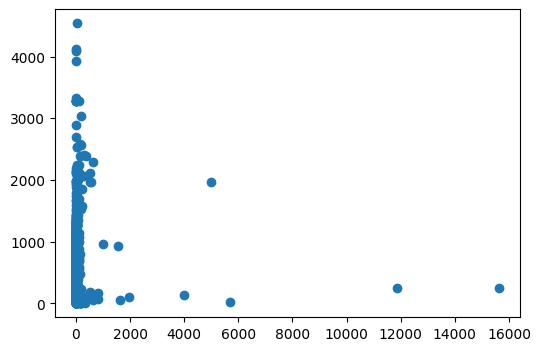

In [34]:
plt.figure(figsize=(6,4))

plt.scatter(y_si, y_cc50);

In [35]:
np.corrcoef(y_si, y_cc50)[0][1]

np.float64(-0.006817715114527132)

### Корреляция Пирсона

<Axes: >

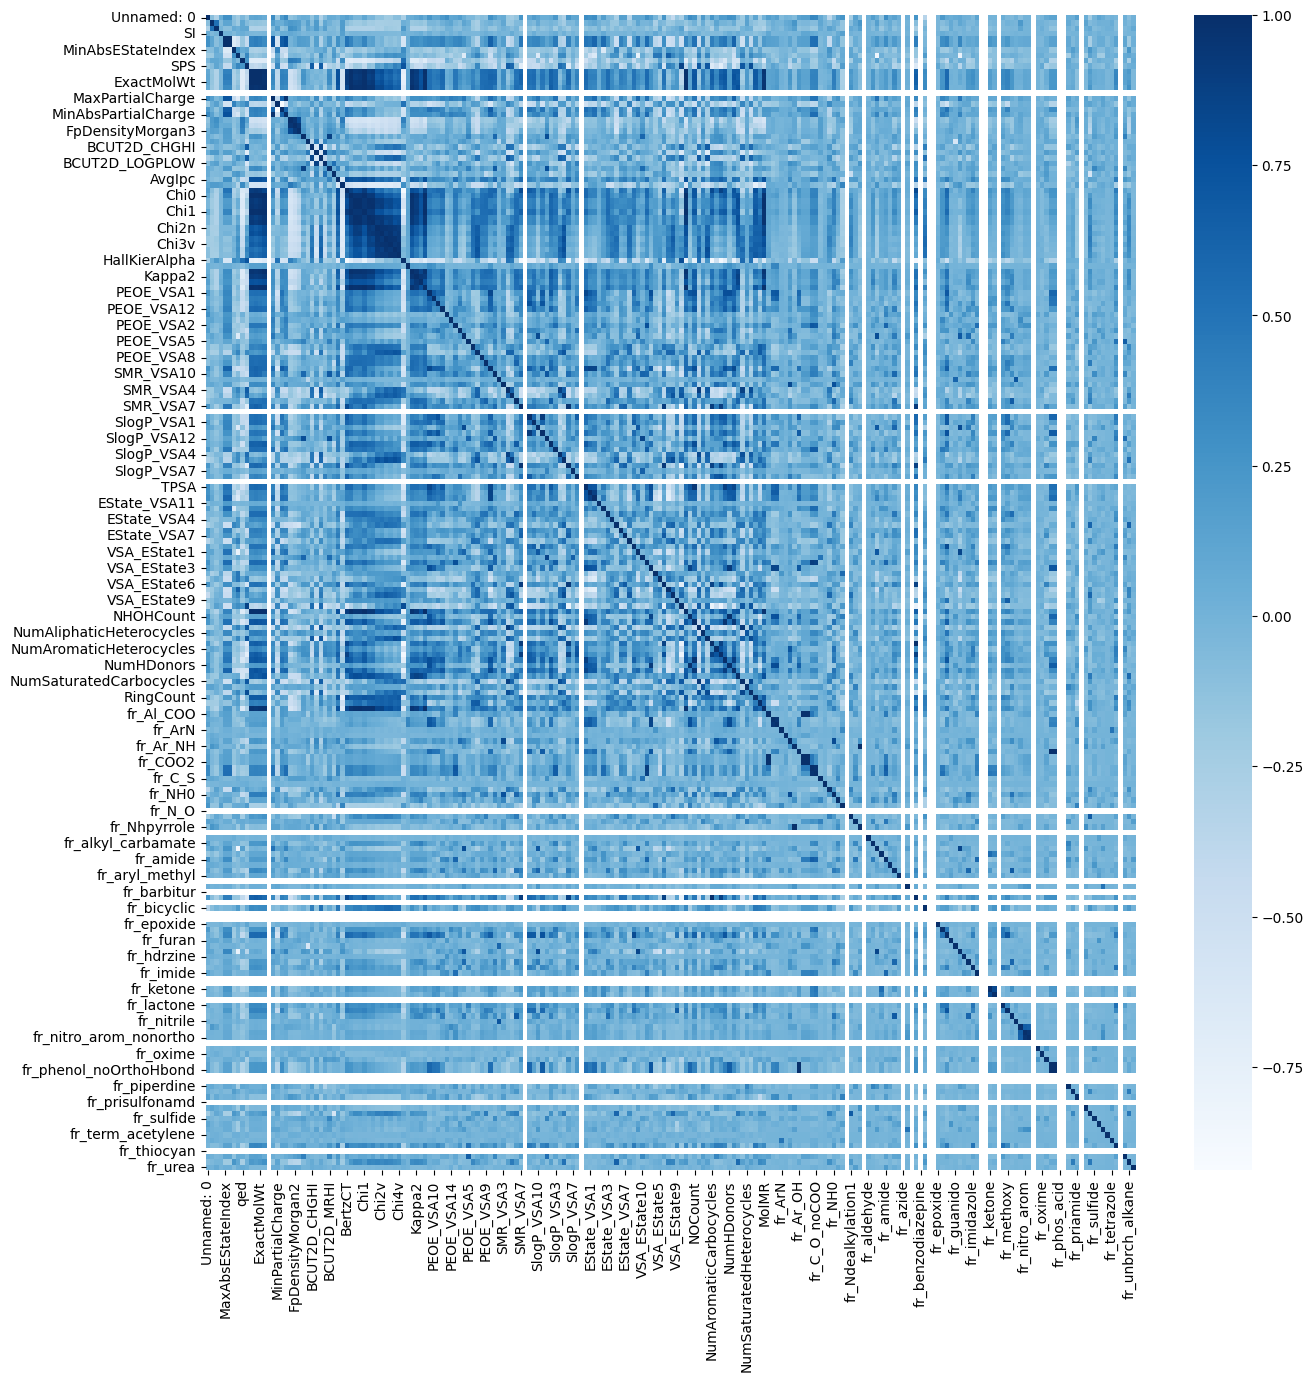

In [36]:
corr = data.corr() # матрица корреляций
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap="Blues", annot=False)

**Корреляция Спирмена**

Коэффициент корреляции Спирмена основан на ранжировании значений переменных и измеряет степень монотонной связи между ними.

Значение коэффициента корреляции Спирмена лежит в диапазоне от -1 до 1. Значение -1 означает полную отрицательную связь (чем больше одна переменная, тем меньше другая), значение 1 означает положительную связь (чем больше одна переменная, тем больше другая), а значение 0 означает отсутствие связи между переменными.

Можно использовать для порядковых переменных!

spearman.svg

* $\rho$	=	Spearman's rank correlation coefficient
* $d_{i}$	=	difference between the two ranks of each observation
* $n$	=	number of observations

[Пример расчета коэффициента корреляции Спирмена](https://statpsy.ru/spearman/primer-raschet-spearman/)

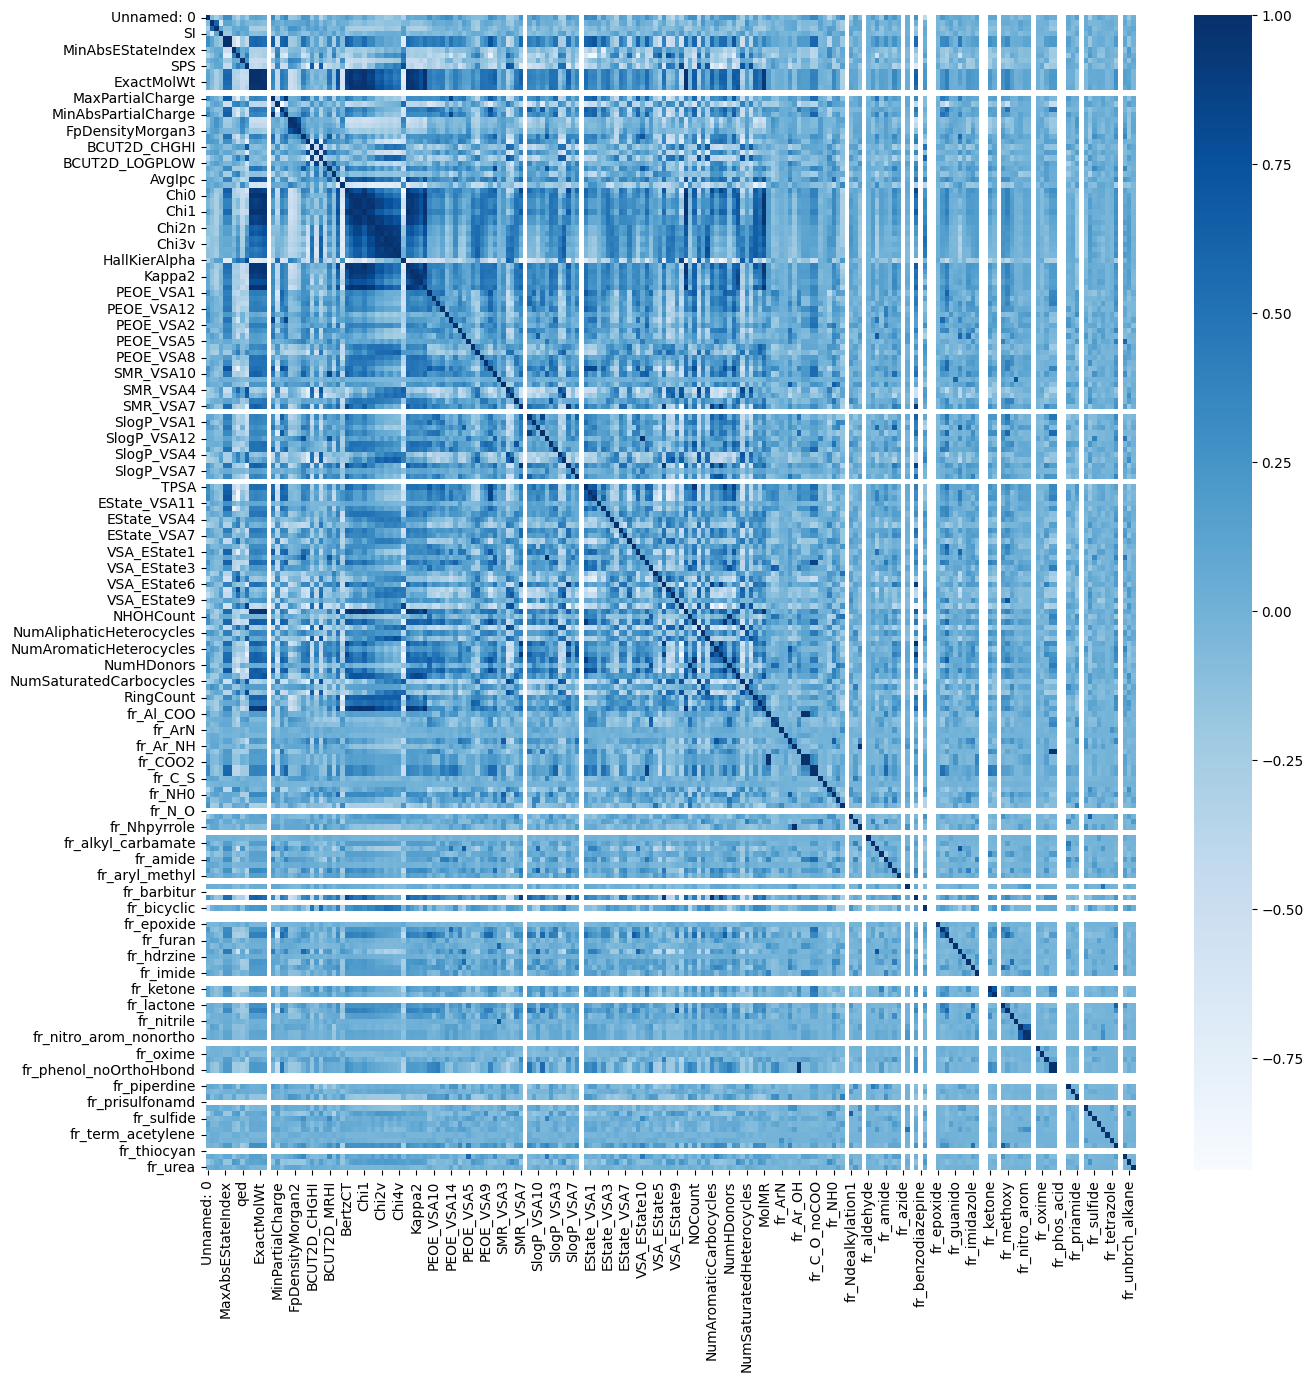

In [37]:
corr = data.corr(method='spearman')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap="Blues", annot=False);

### Строю диаграмму "Ящик с усами", чтобы проверить на выбросы

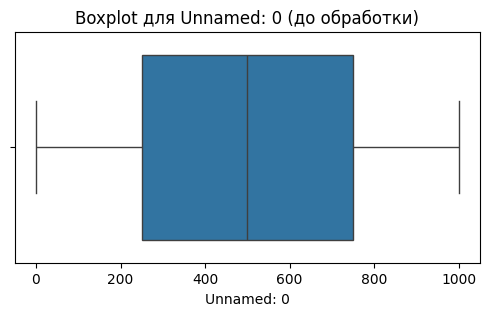

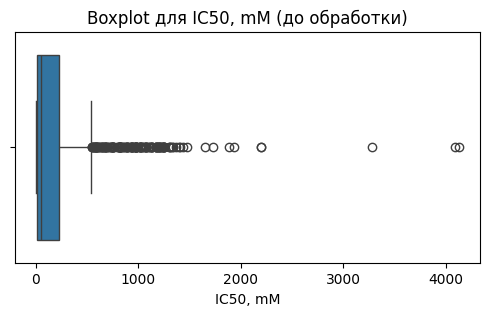

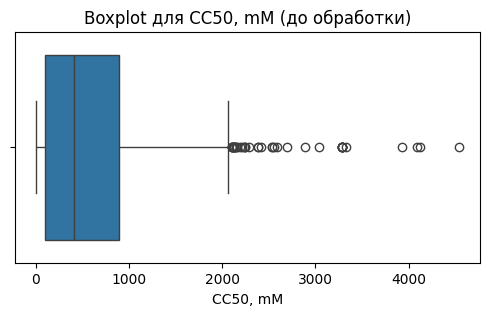

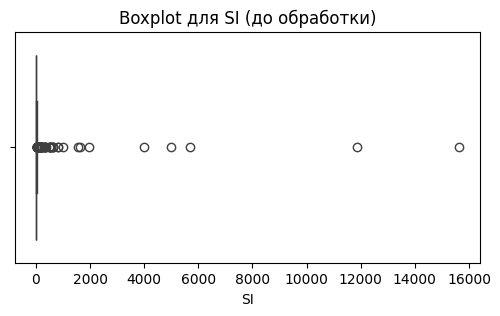

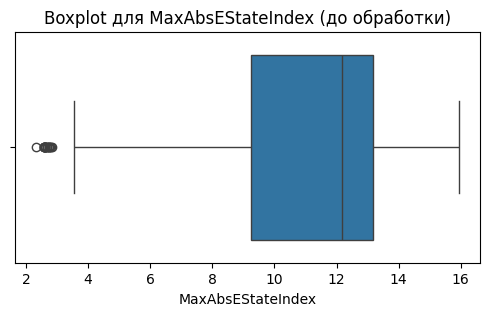

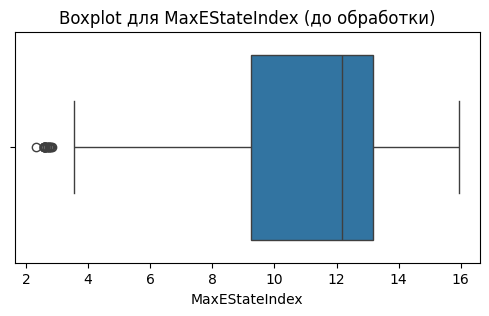

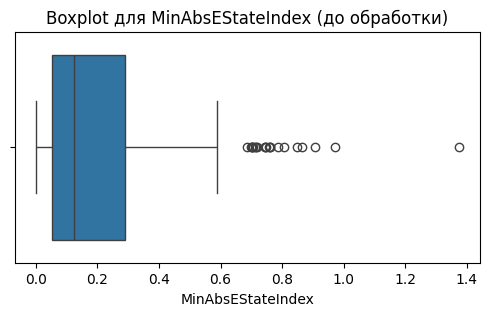

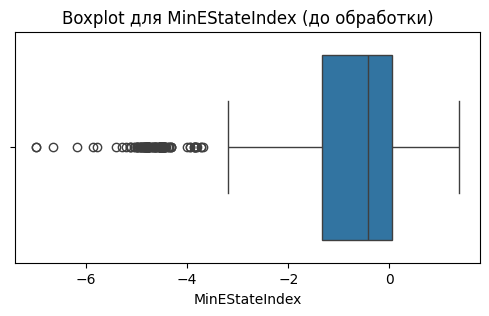

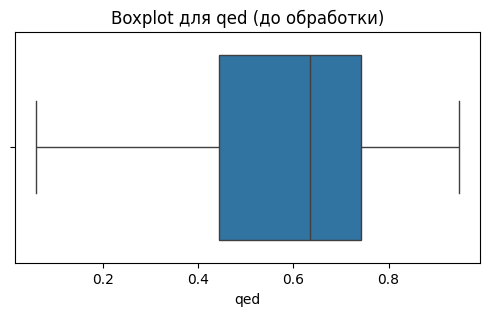

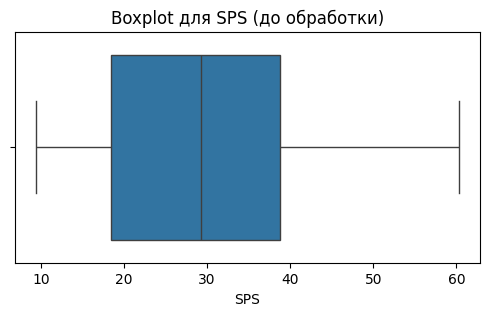

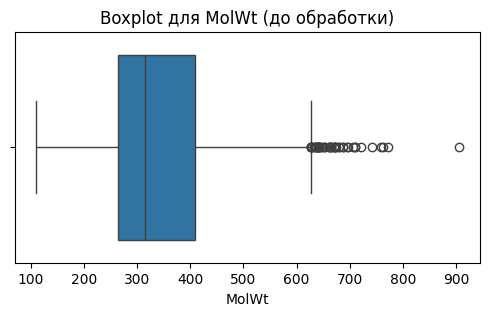

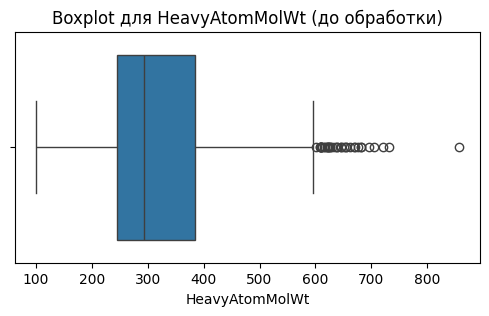

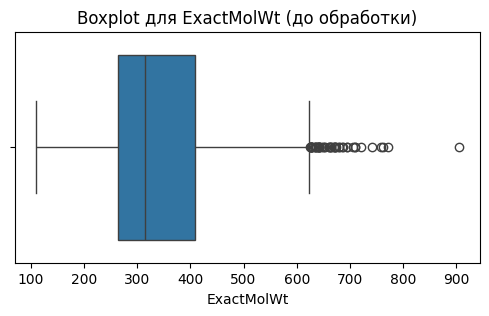

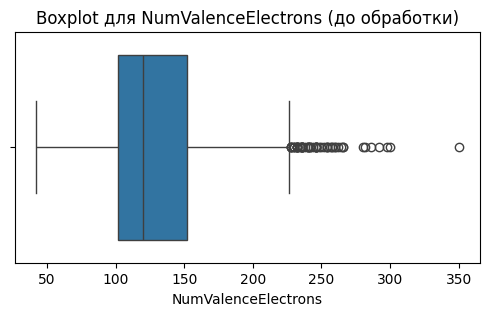

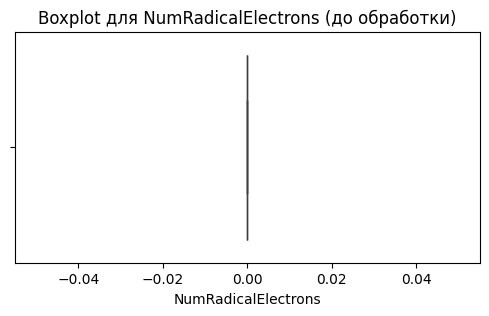

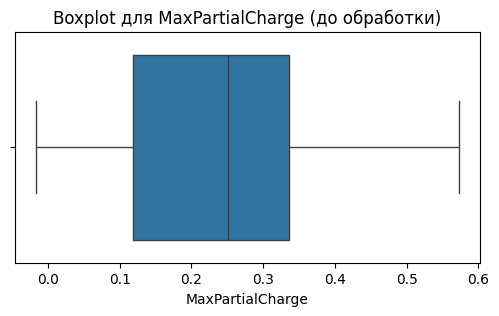

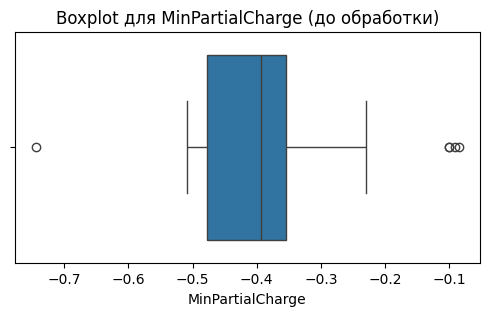

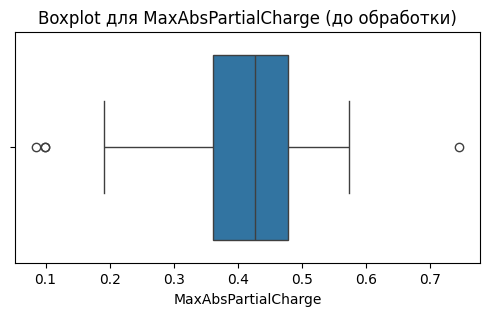

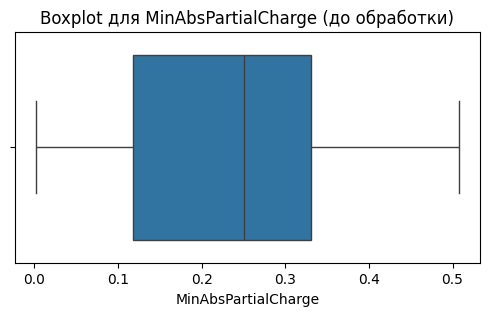

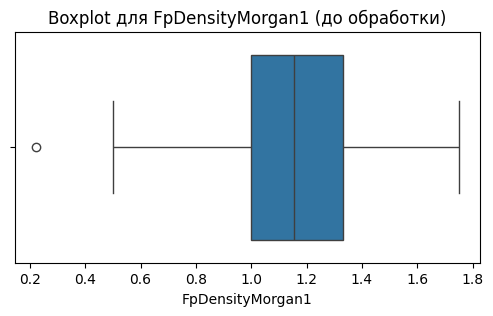

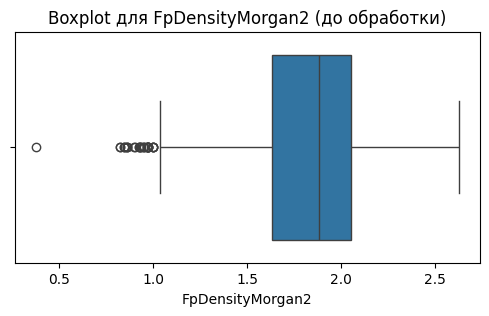

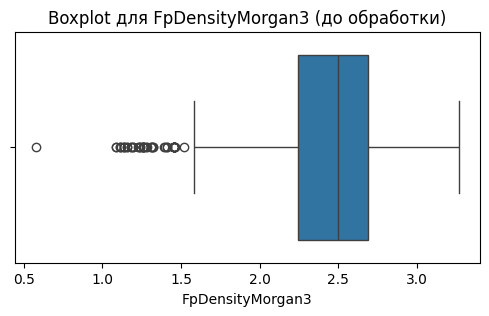

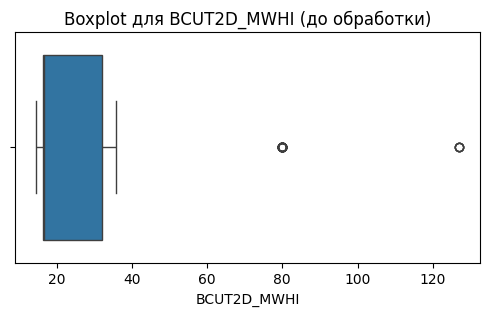

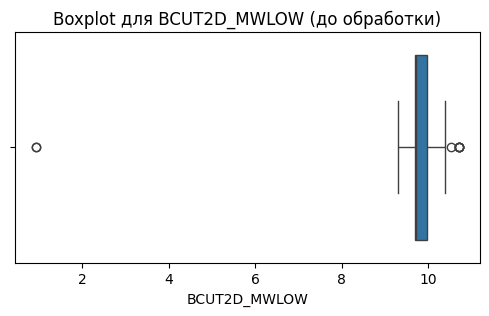

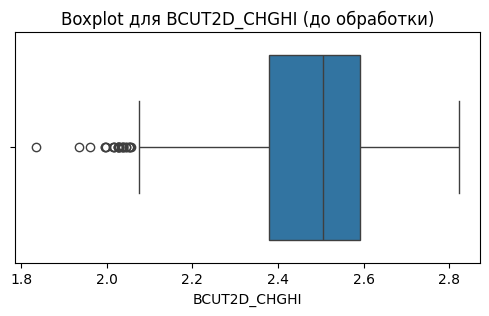

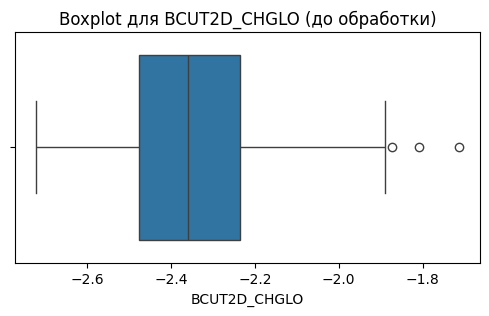

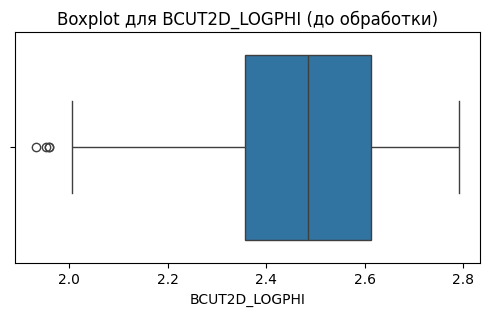

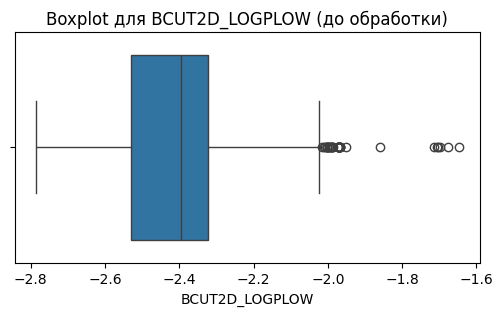

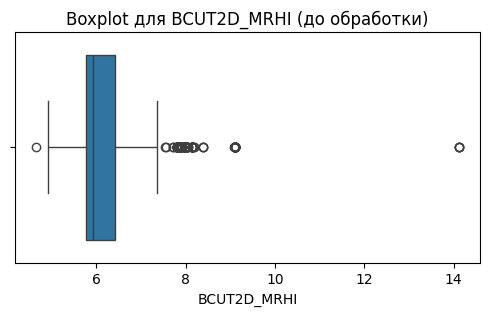

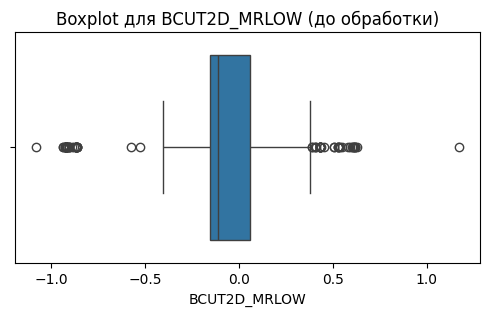

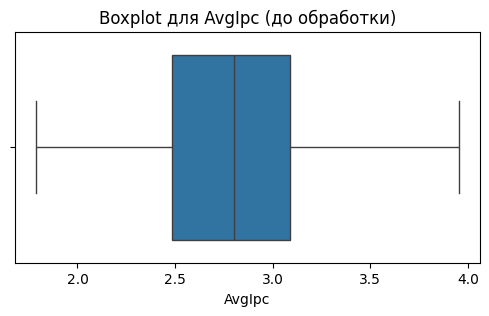

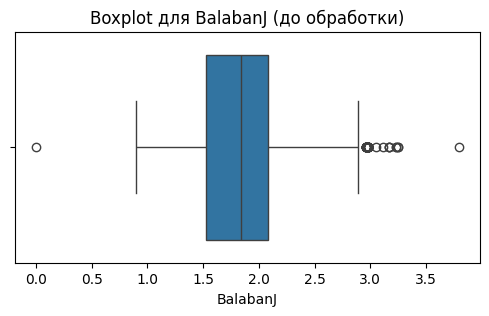

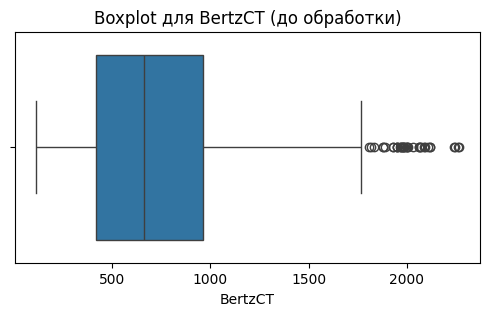

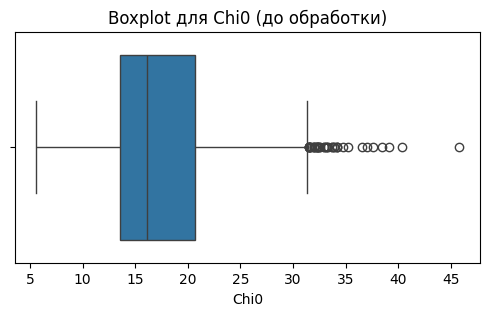

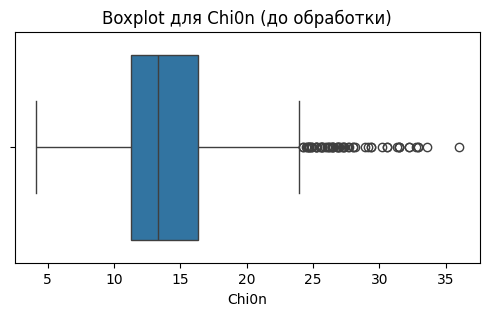

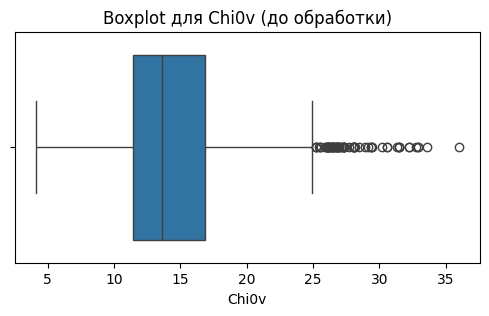

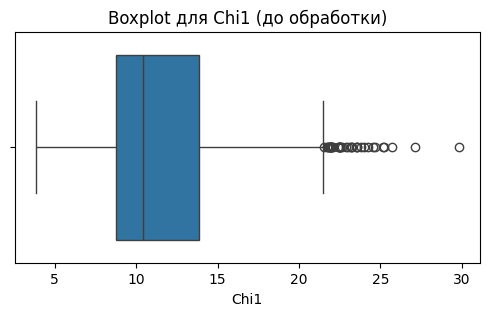

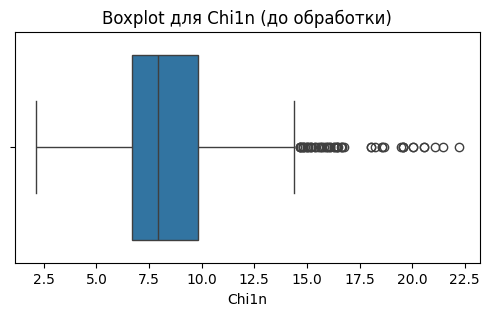

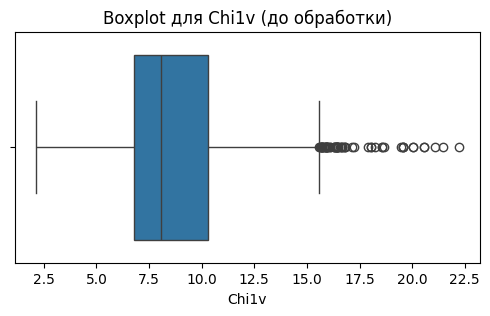

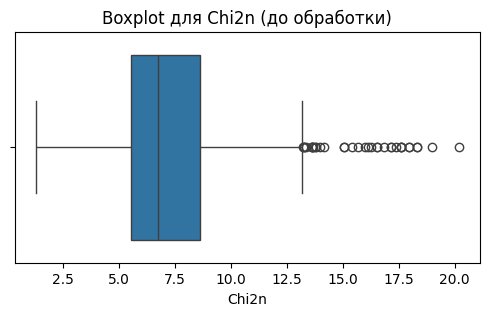

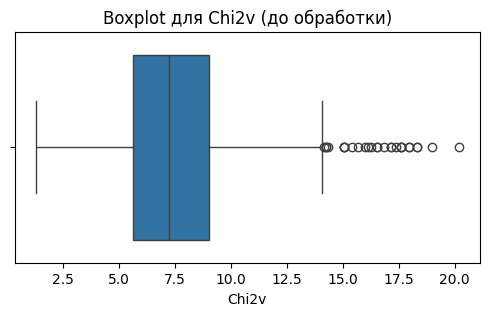

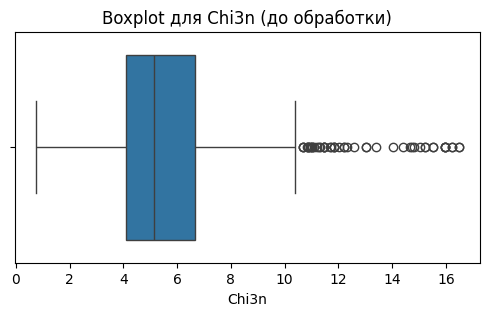

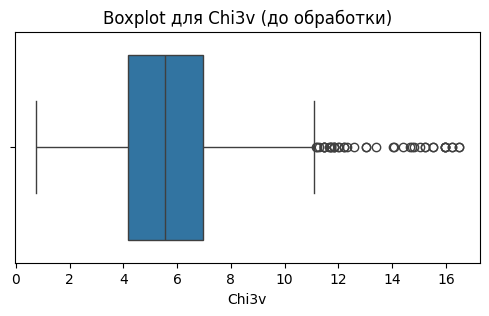

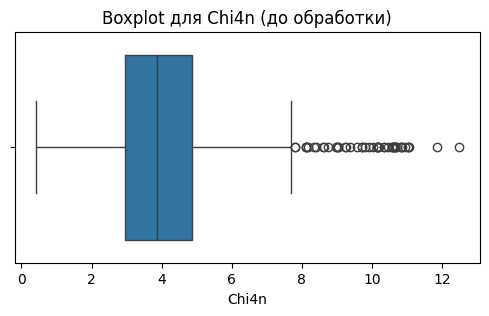

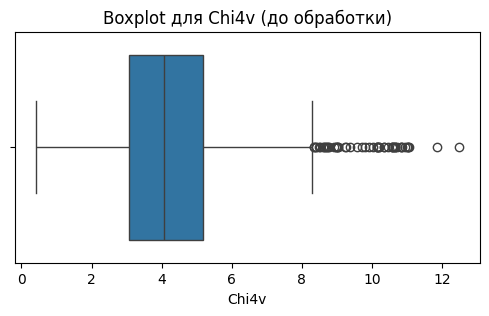

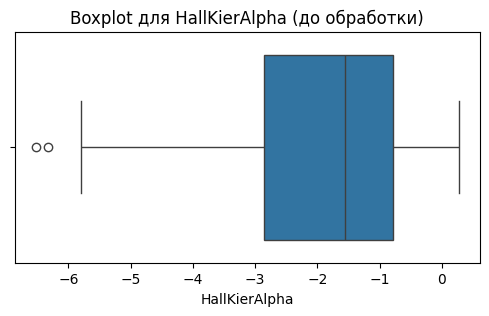

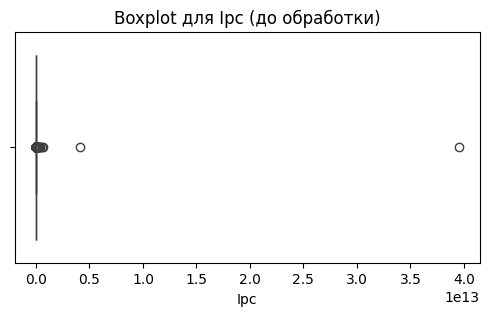

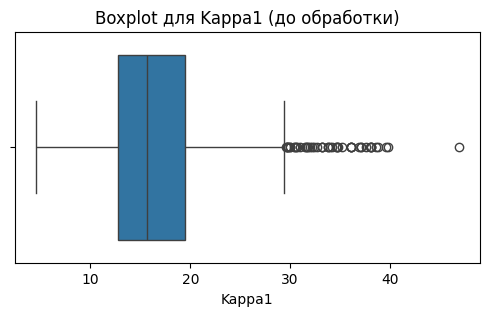

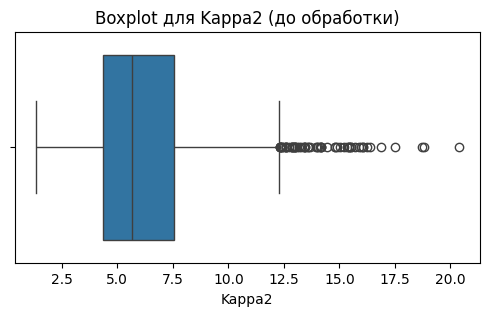

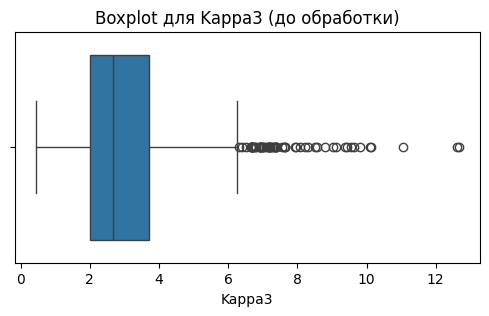

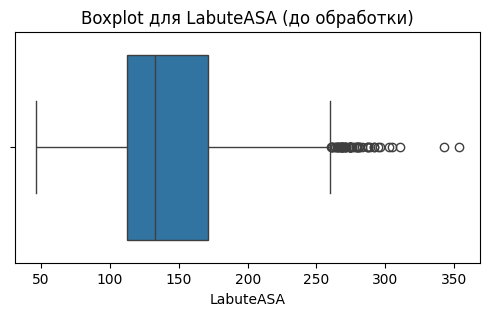

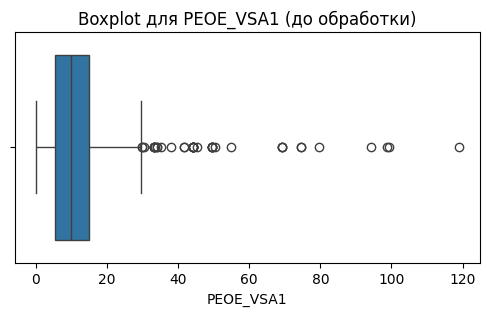

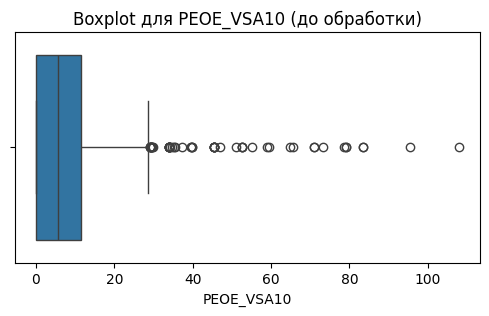

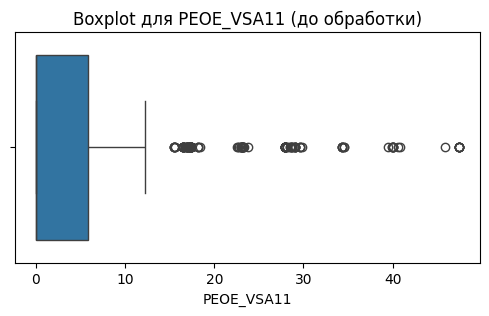

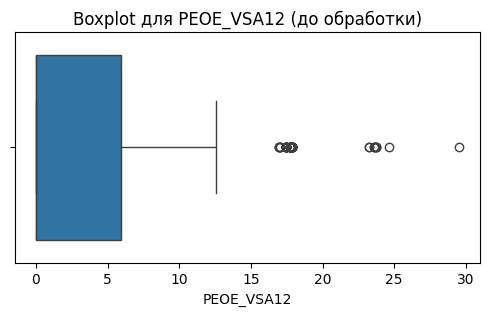

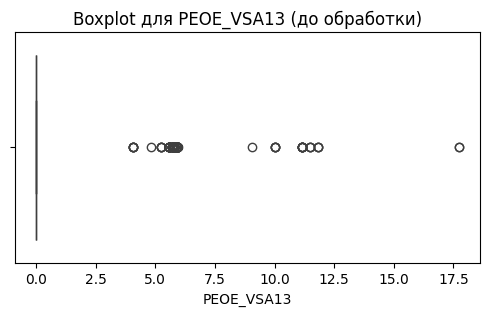

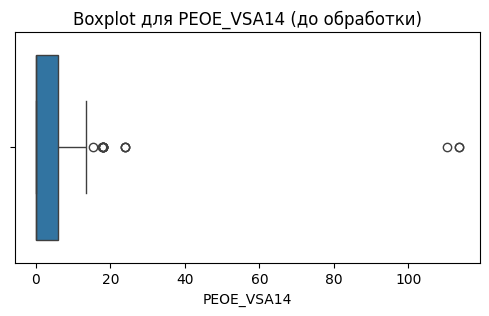

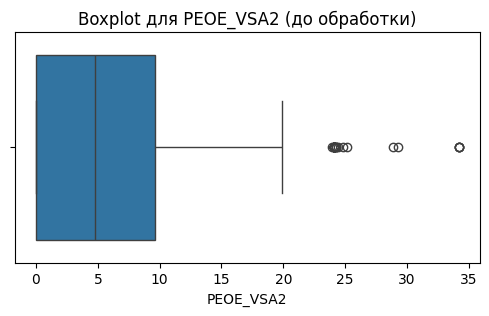

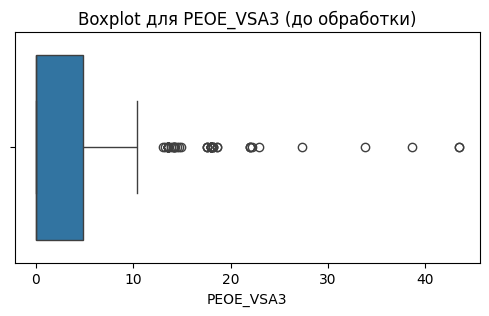

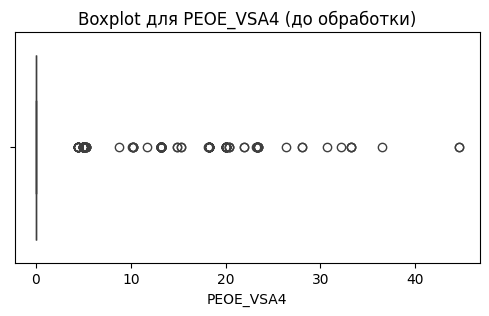

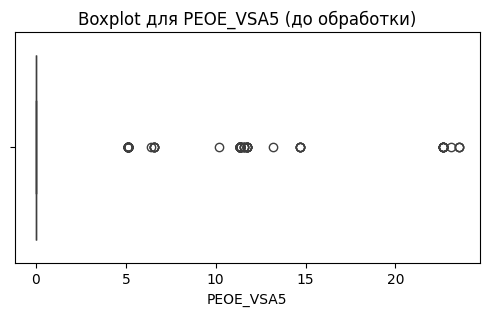

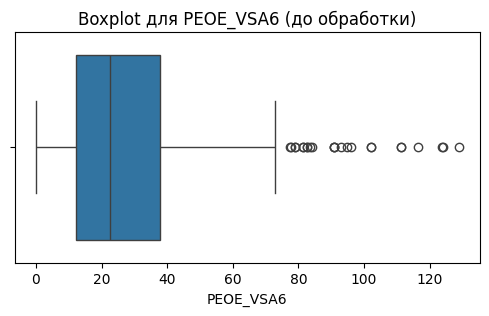

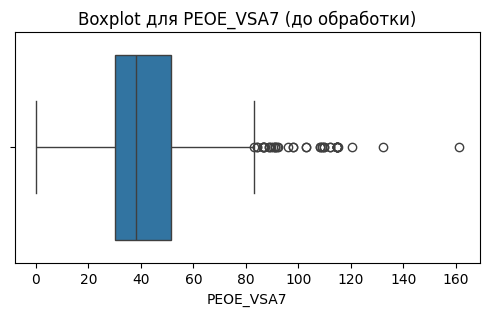

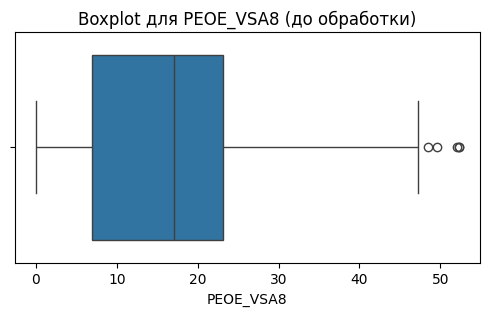

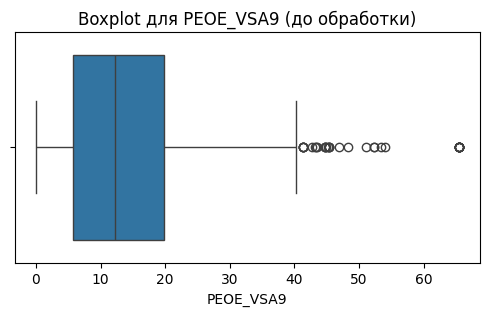

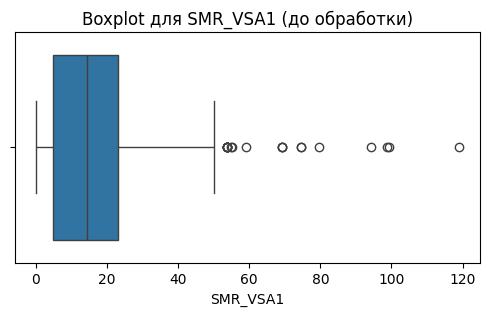

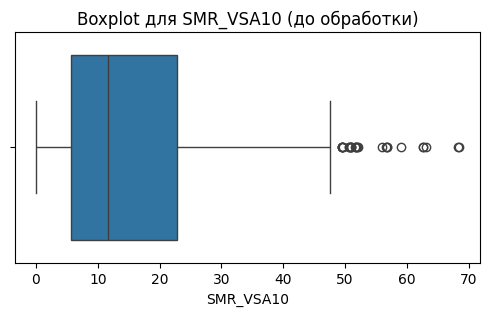

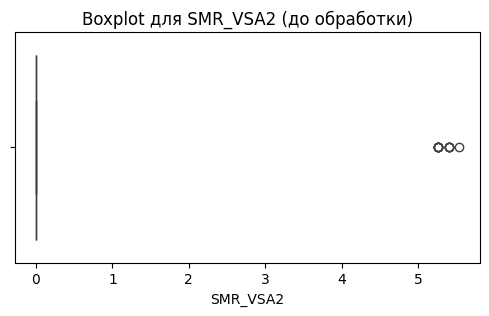

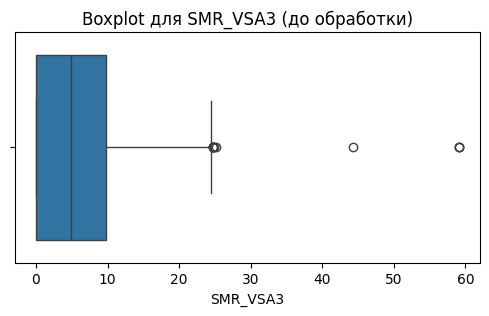

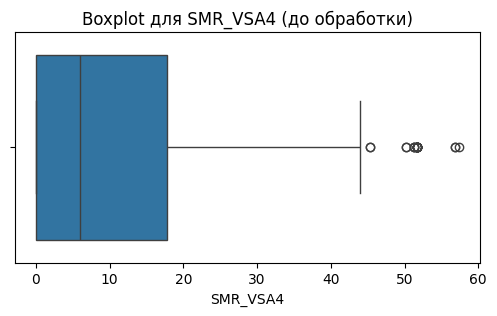

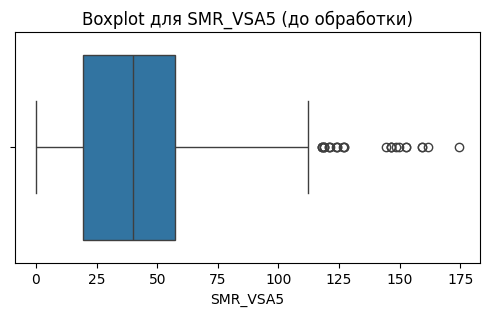

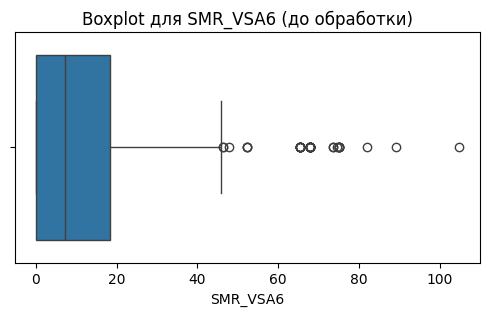

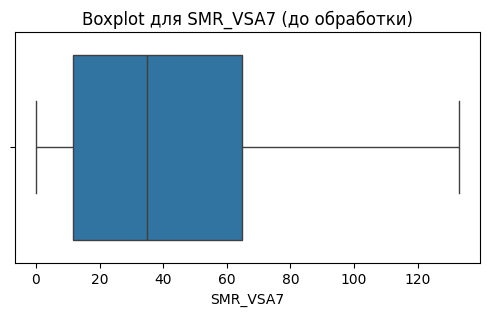

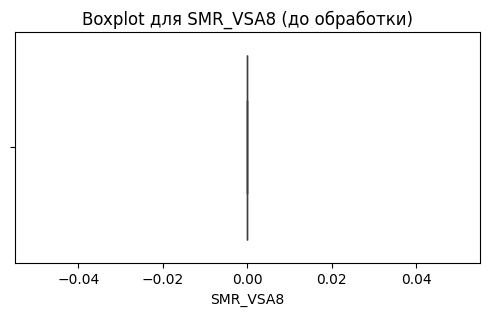

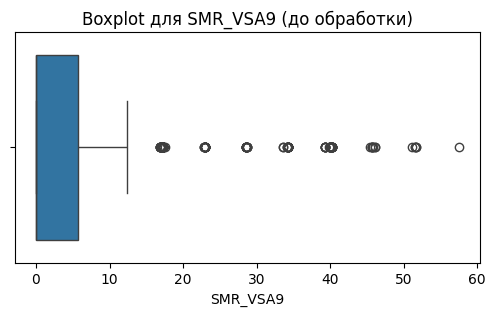

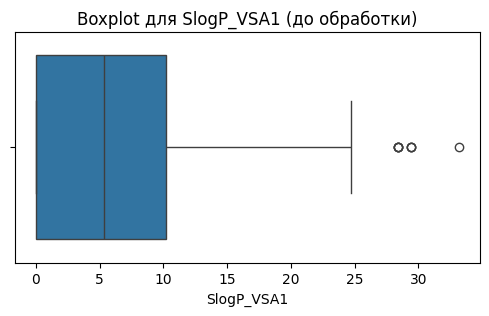

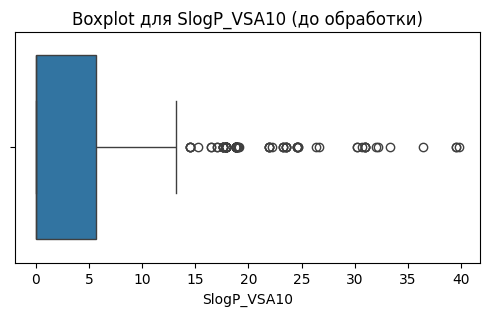

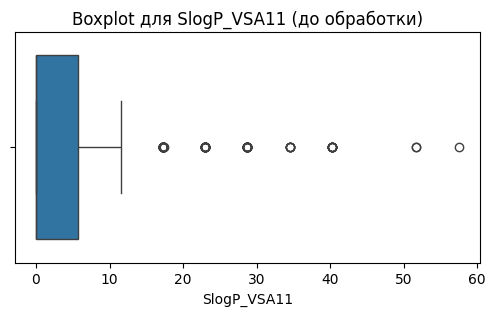

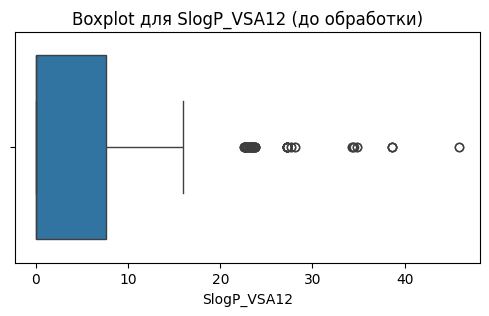

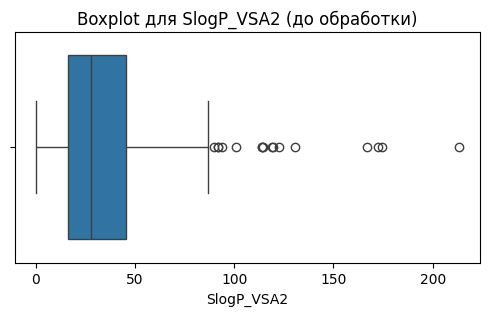

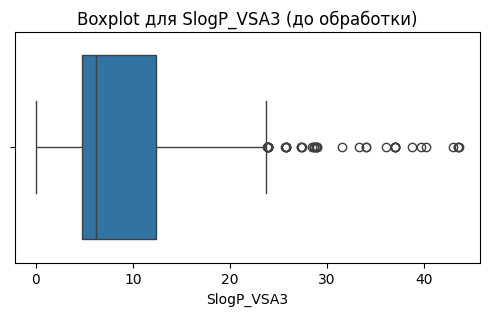

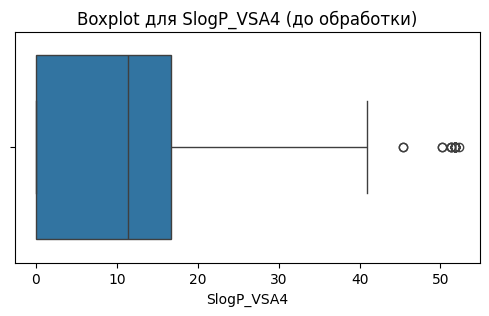

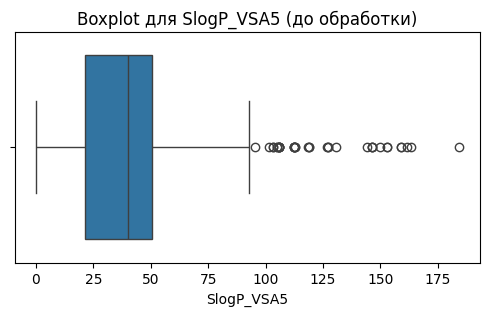

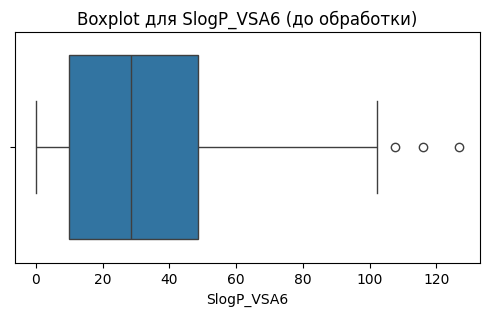

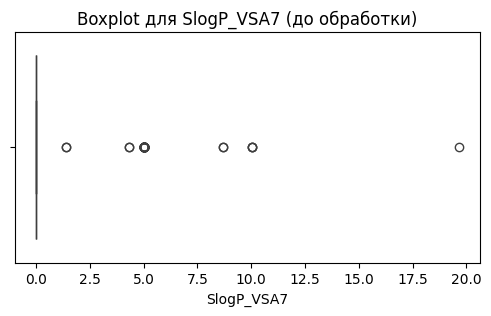

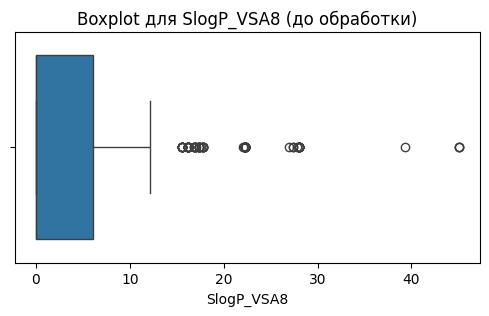

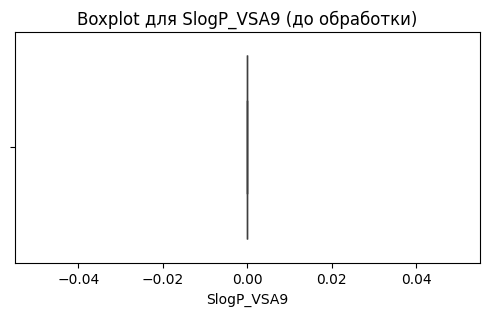

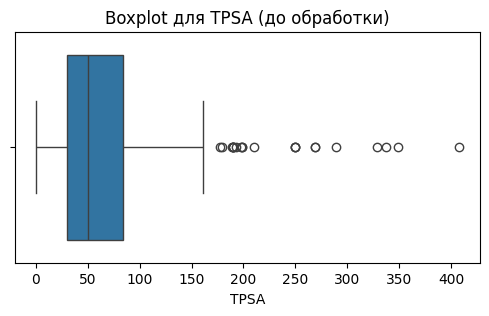

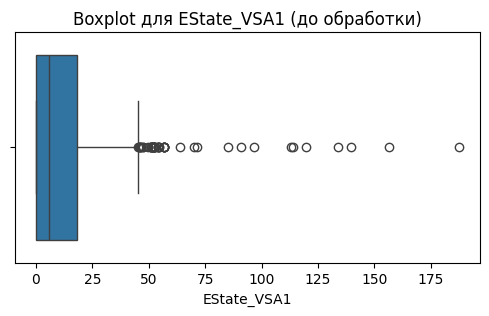

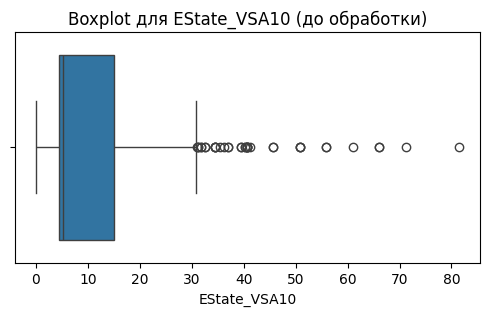

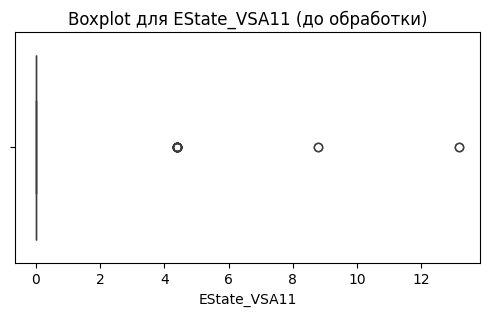

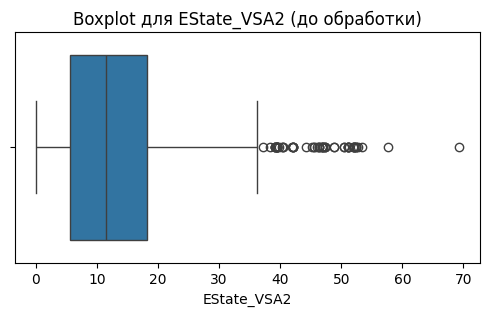

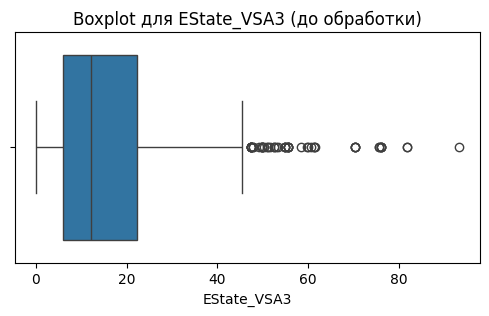

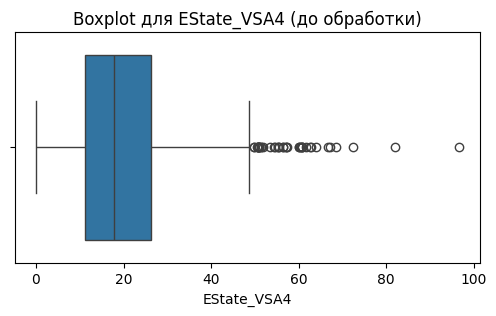

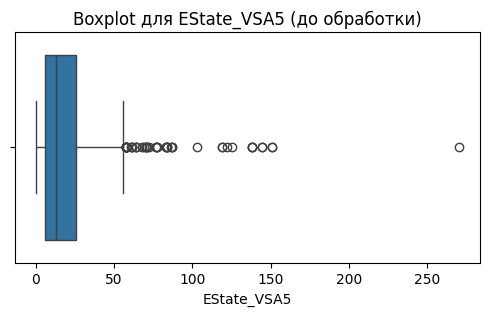

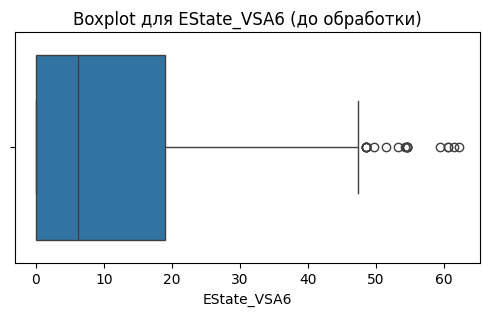

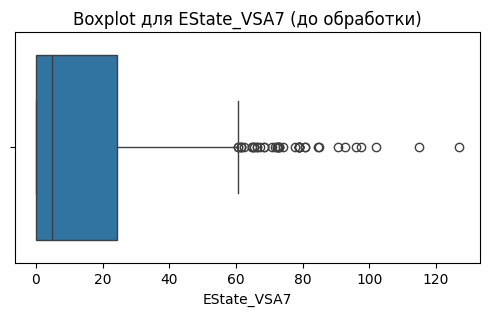

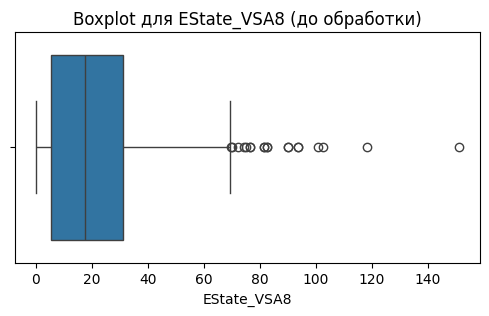

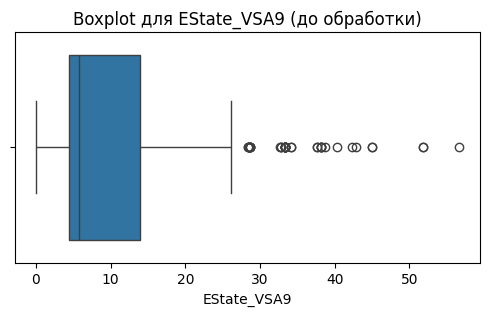

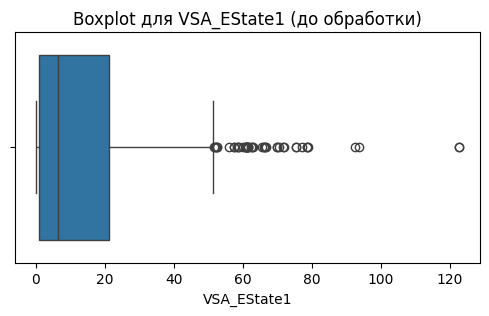

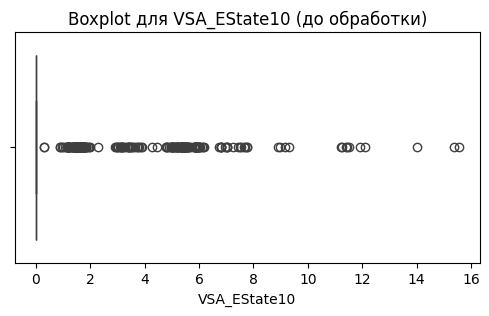

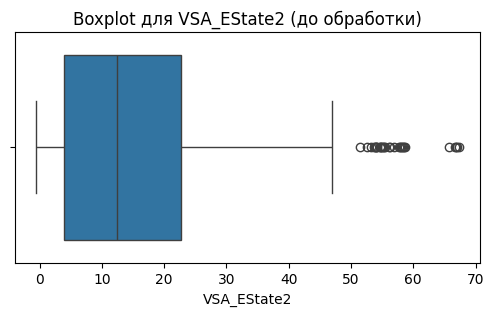

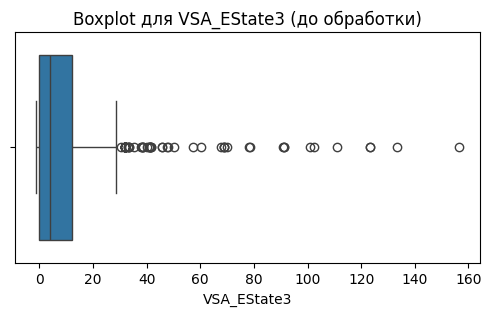

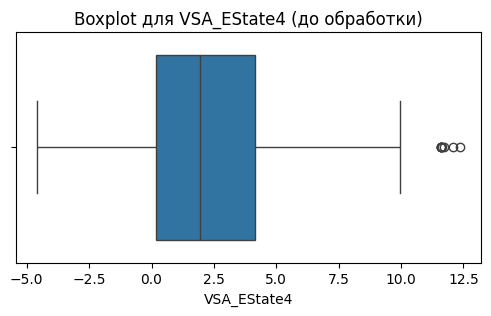

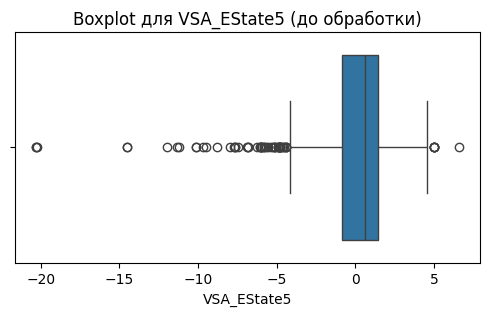

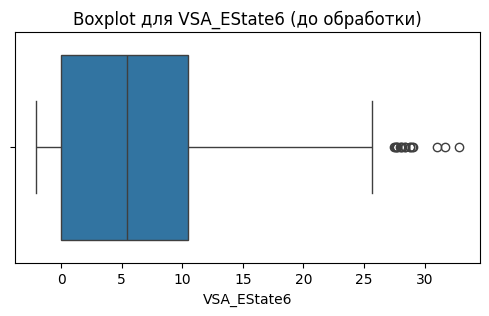

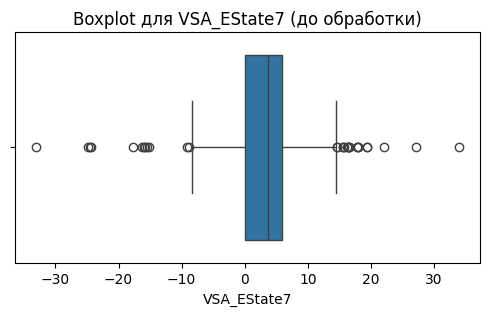

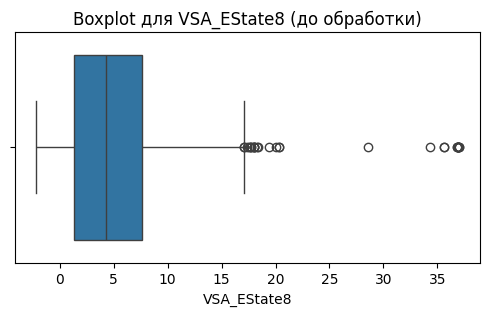

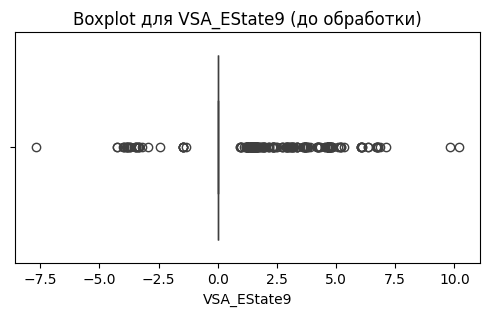

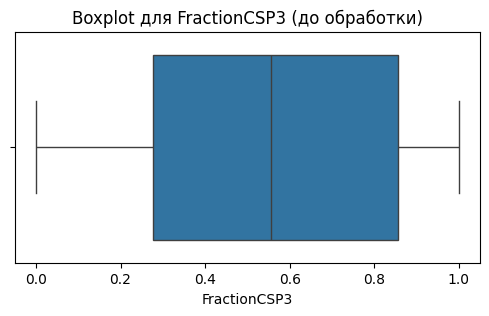

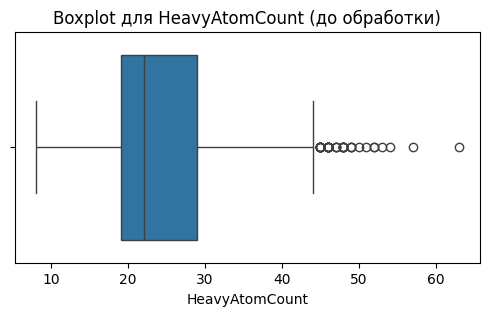

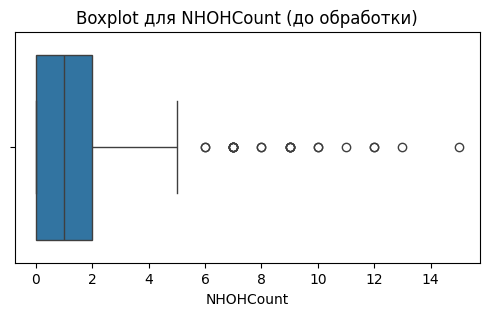

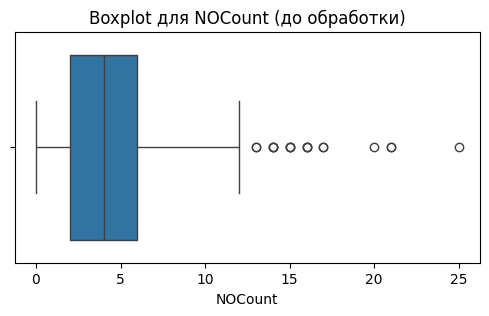

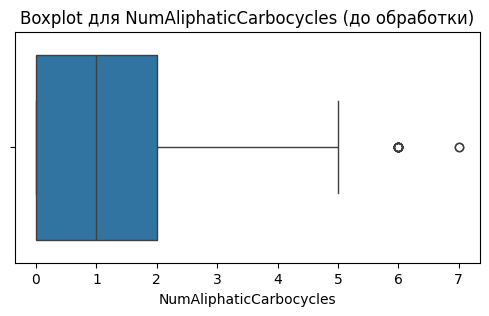

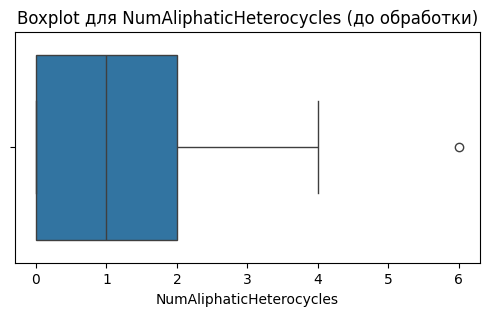

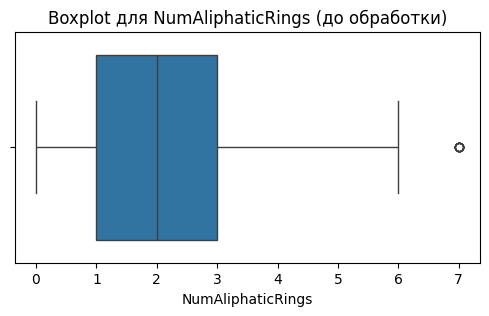

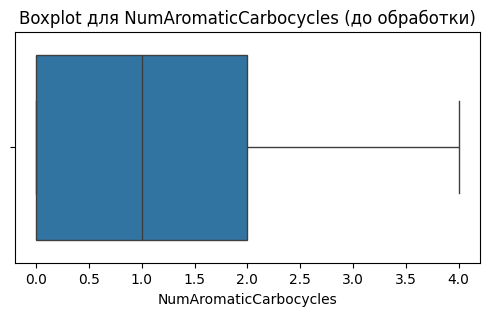

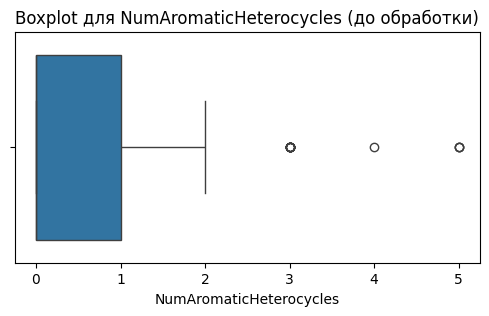

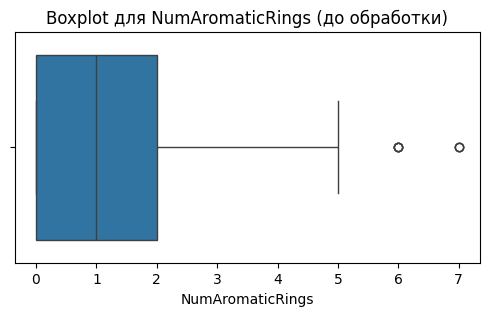

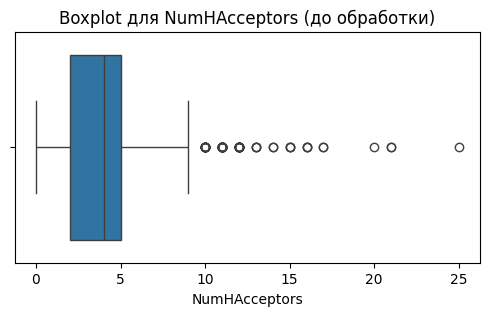

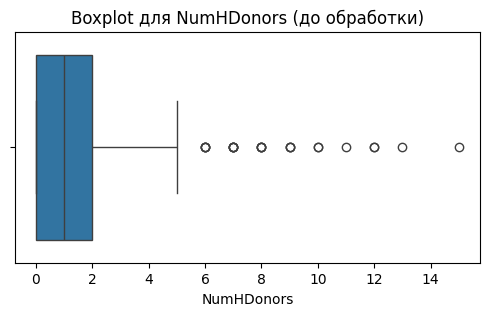

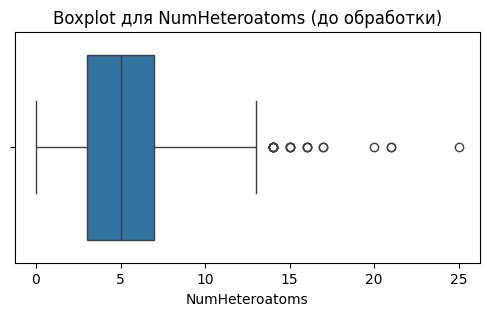

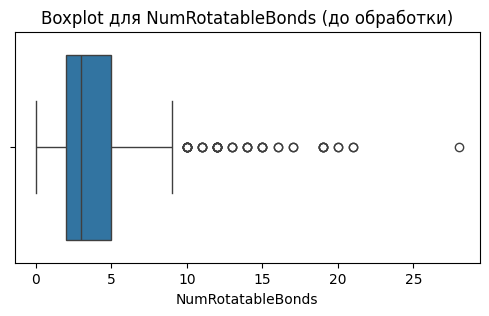

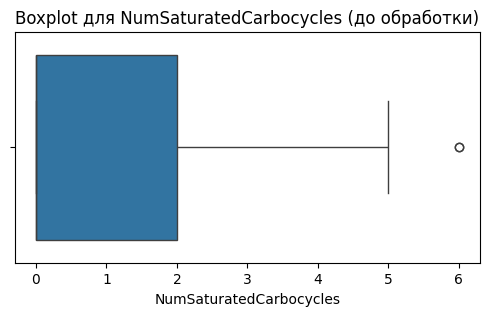

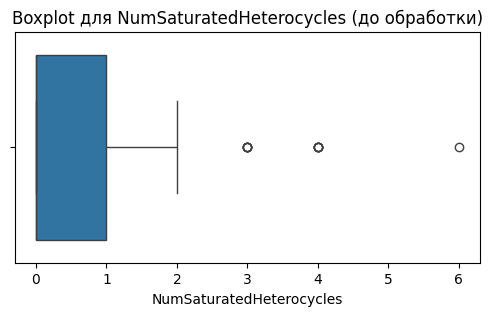

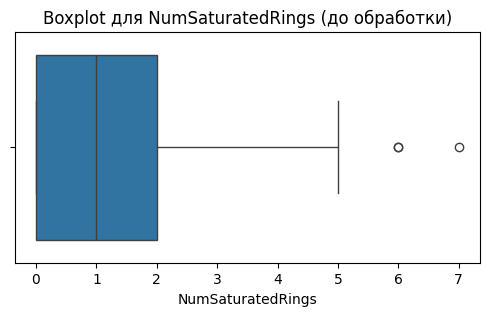

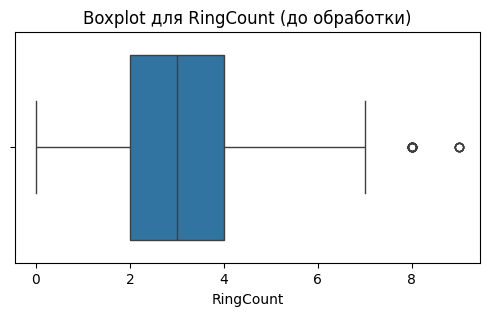

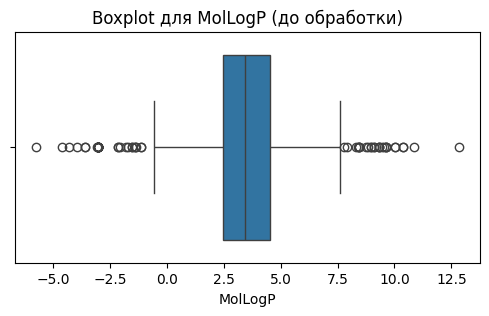

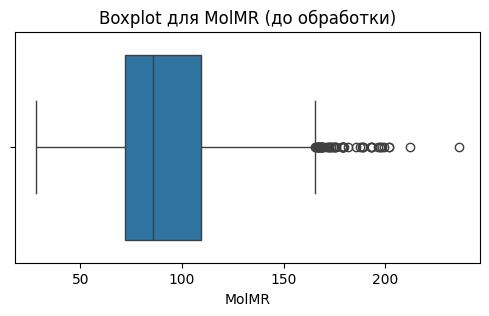

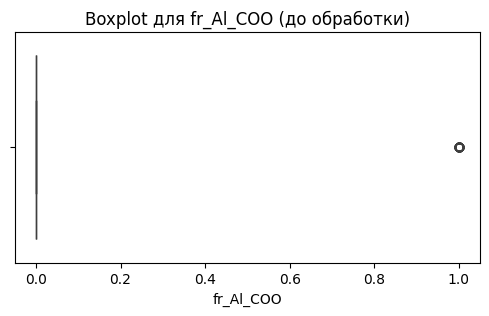

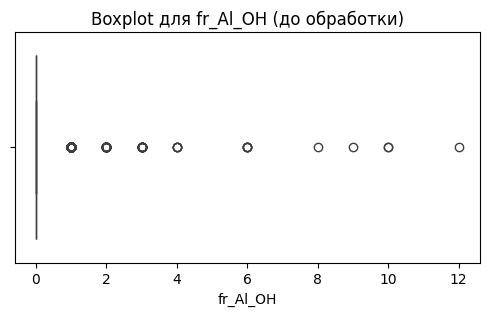

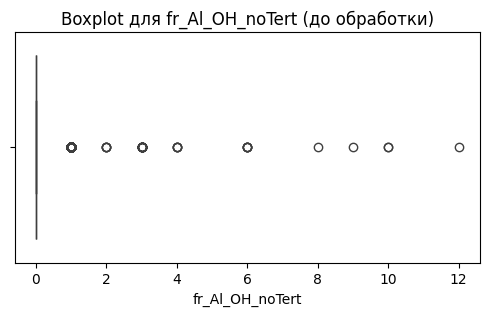

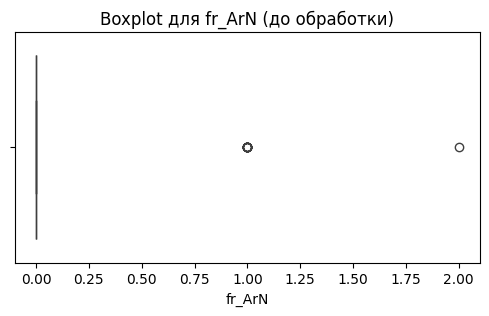

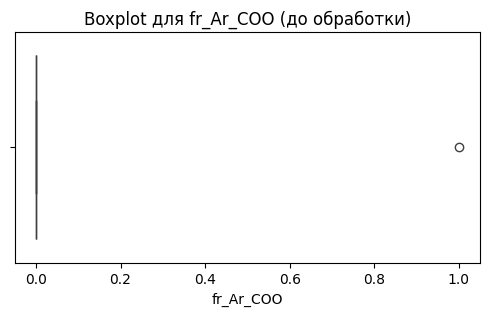

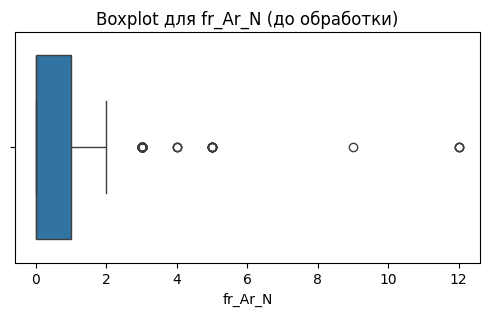

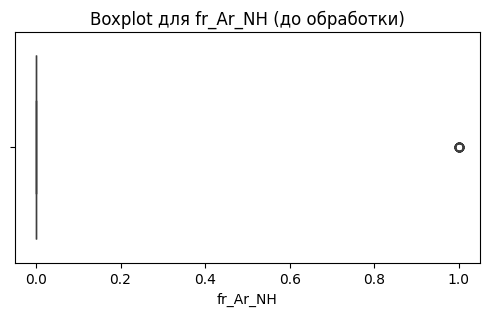

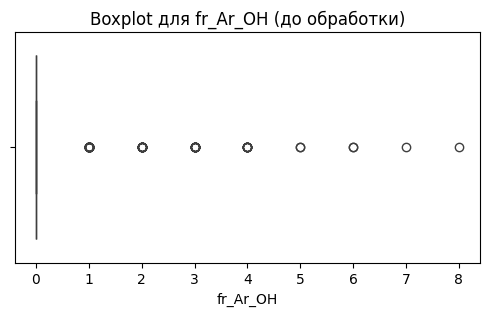

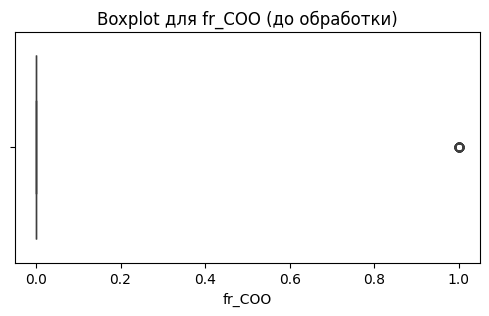

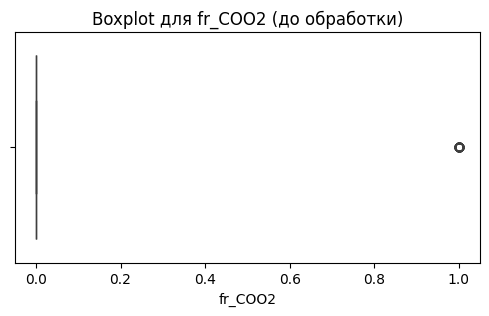

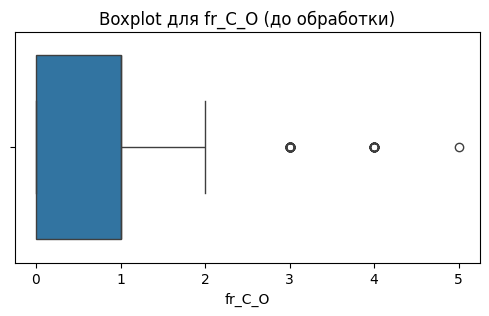

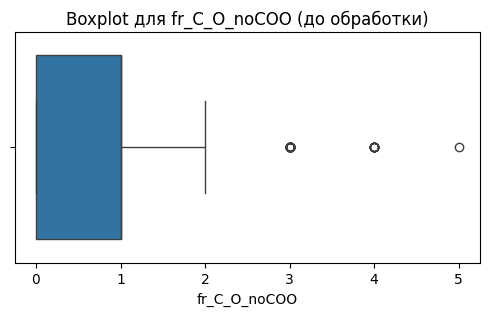

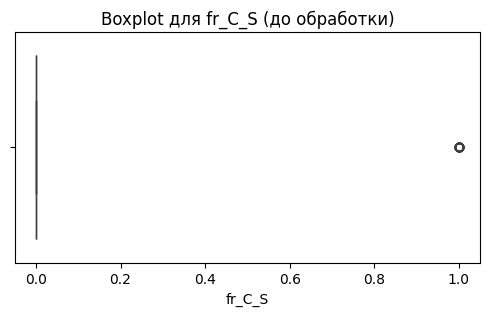

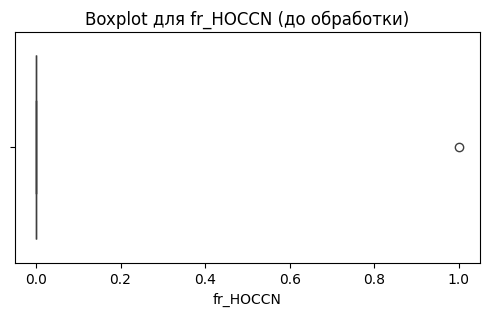

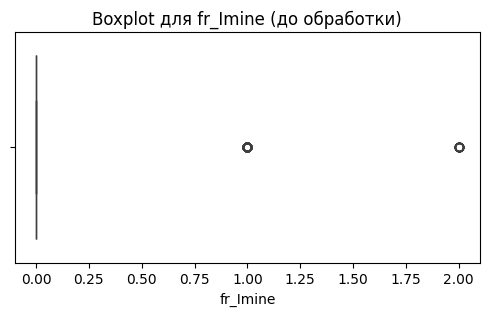

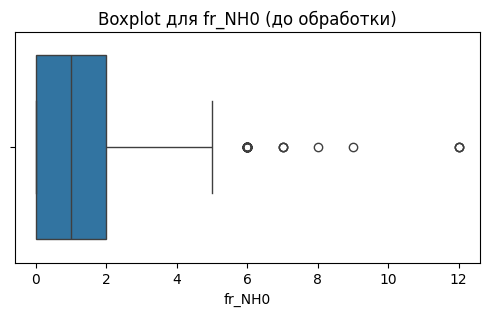

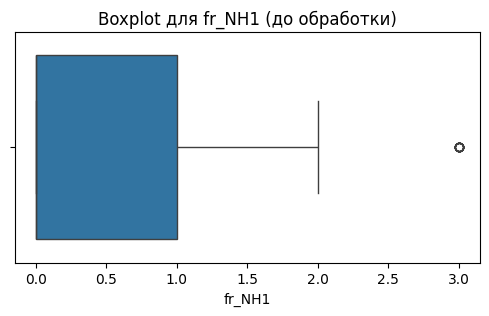

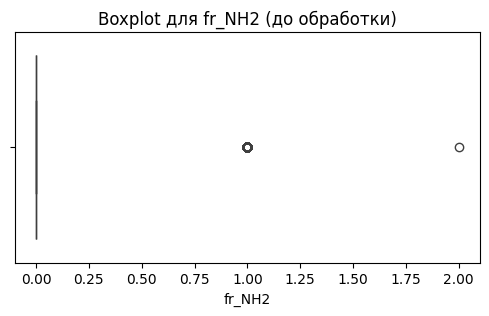

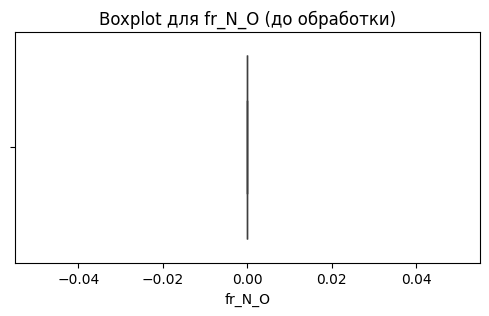

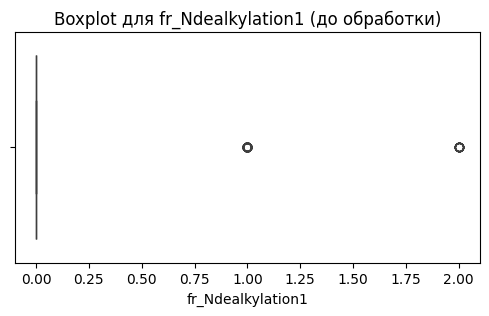

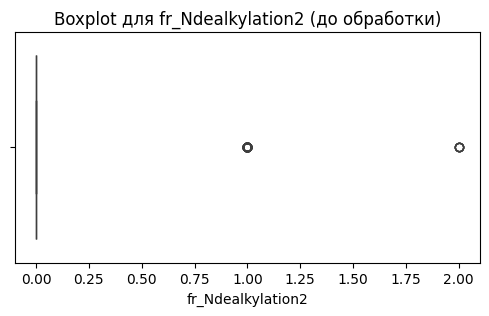

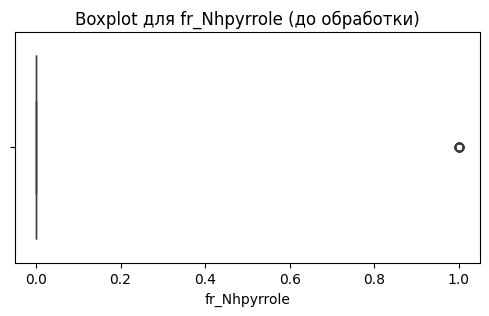

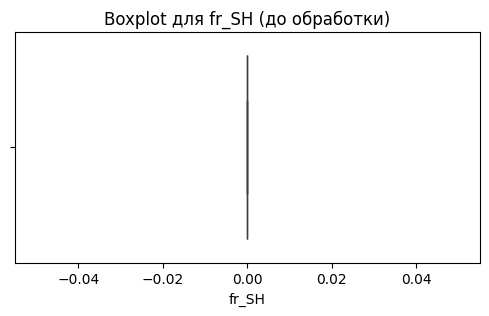

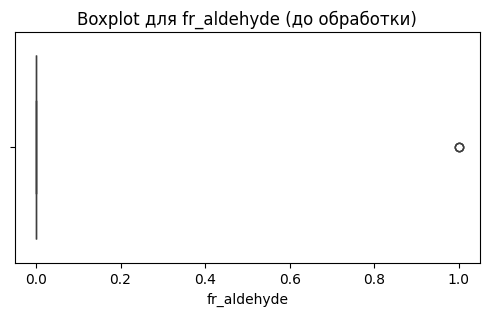

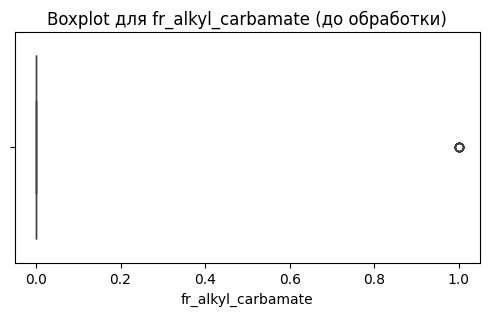

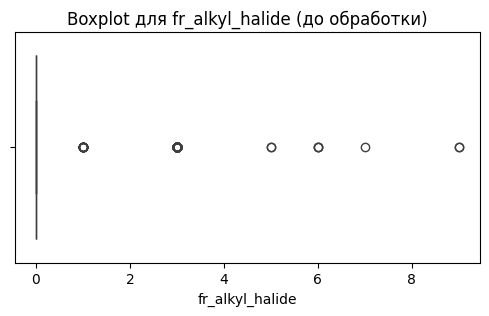

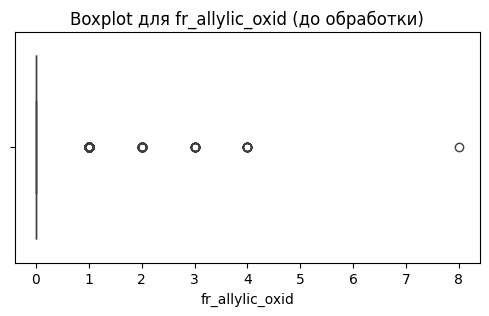

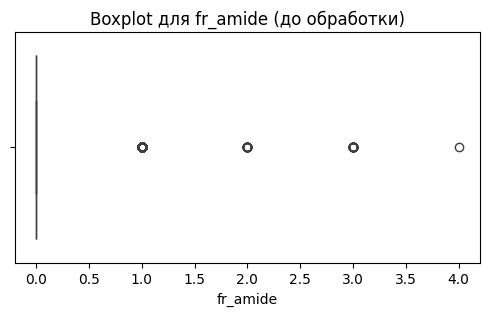

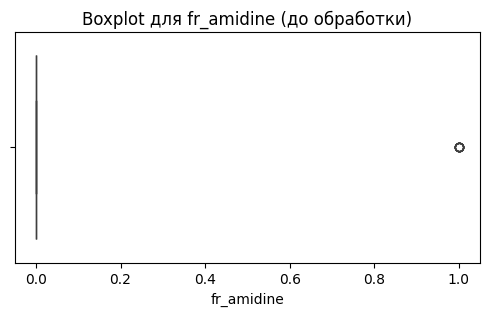

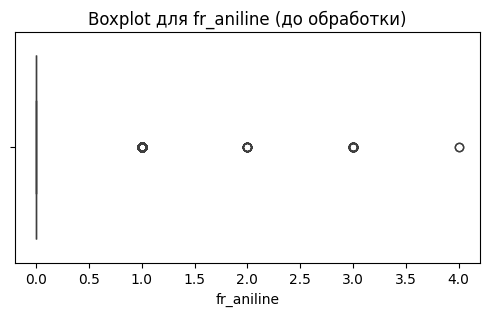

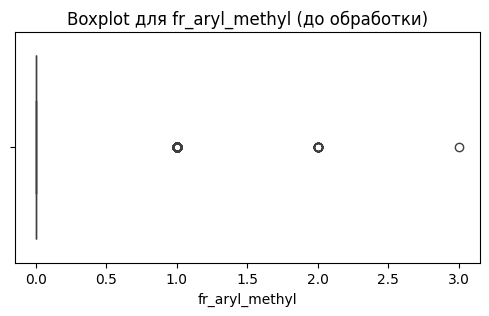

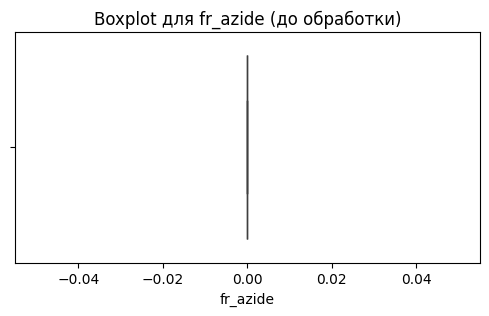

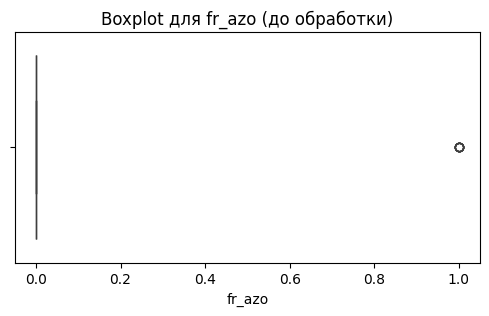

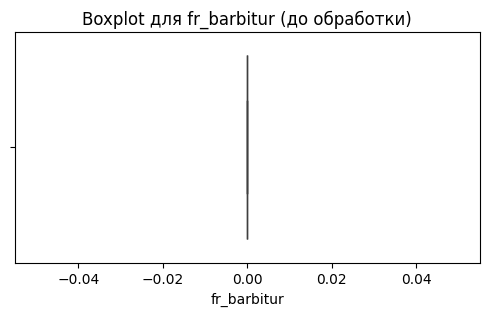

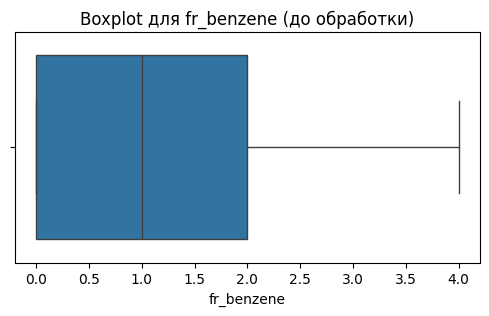

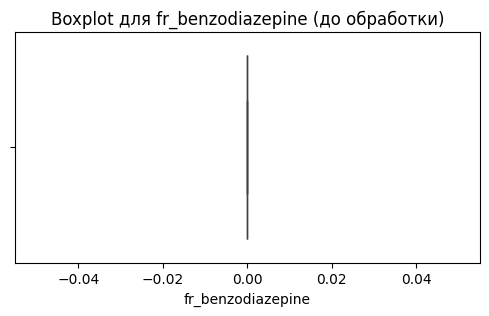

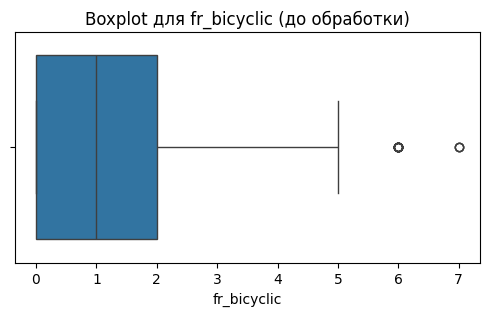

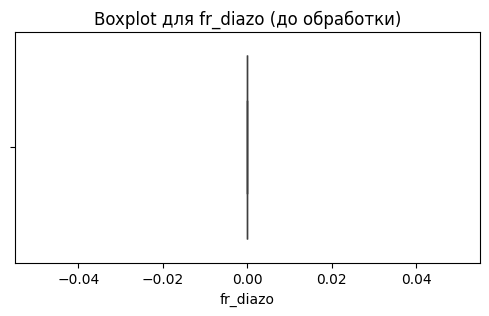

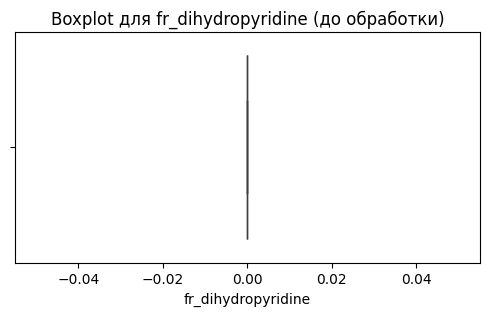

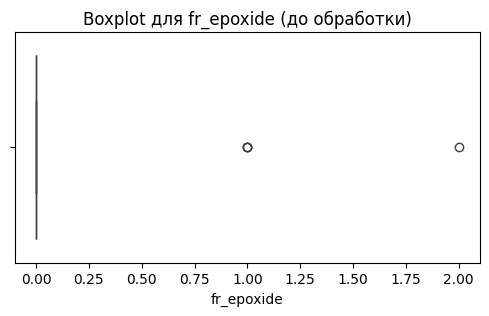

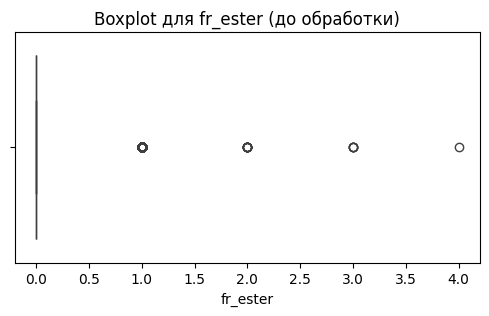

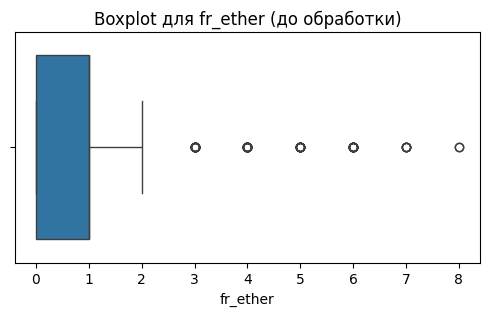

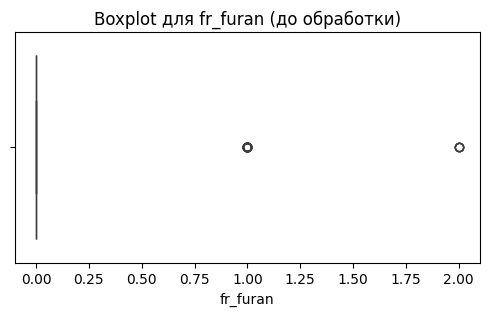

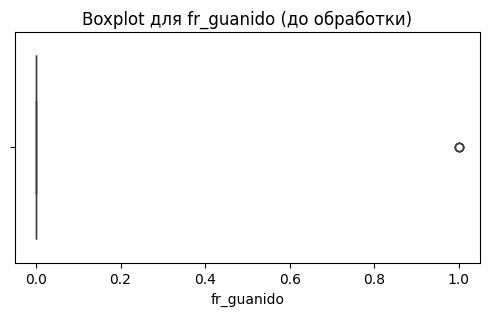

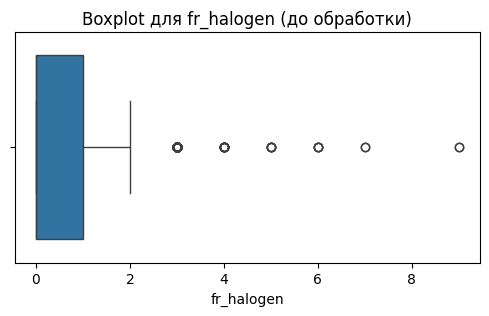

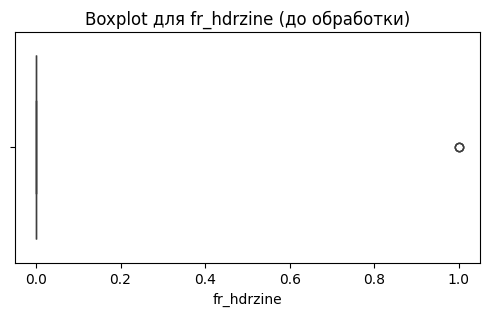

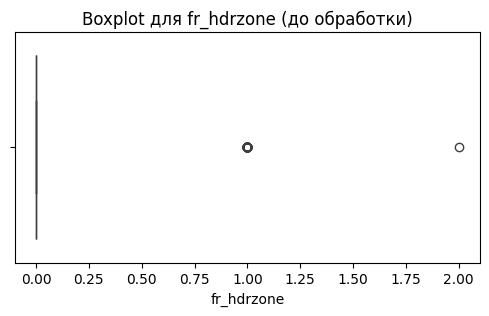

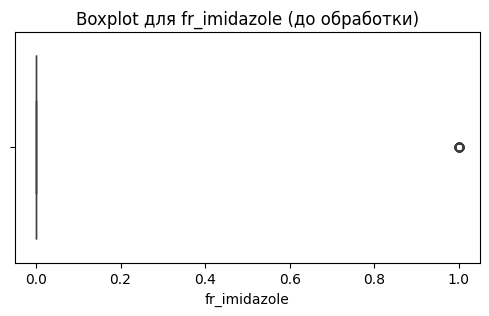

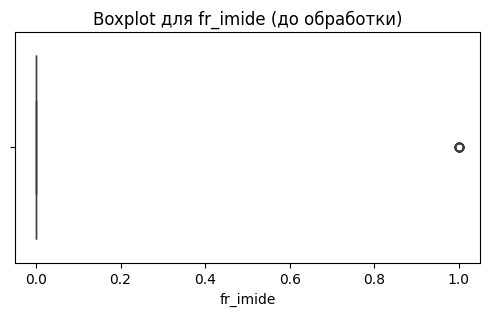

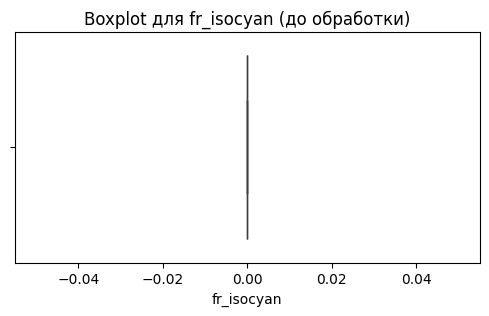

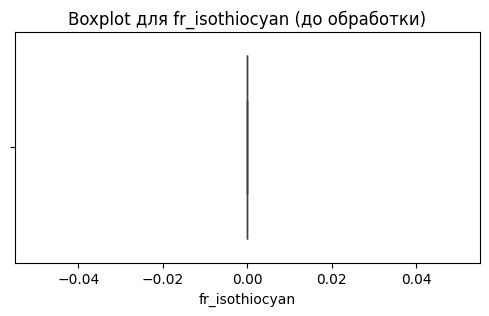

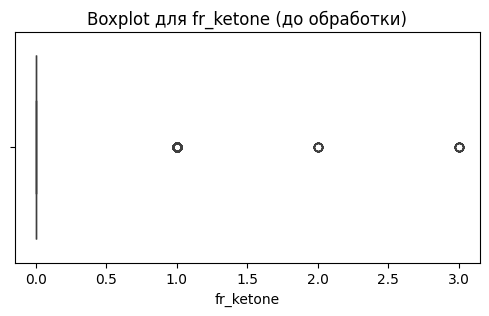

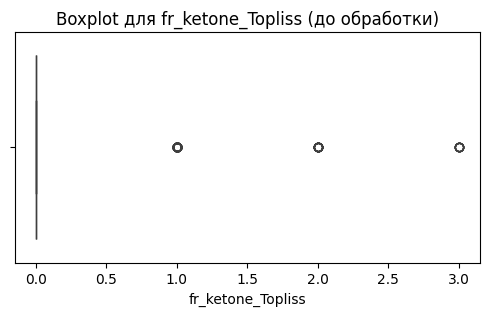

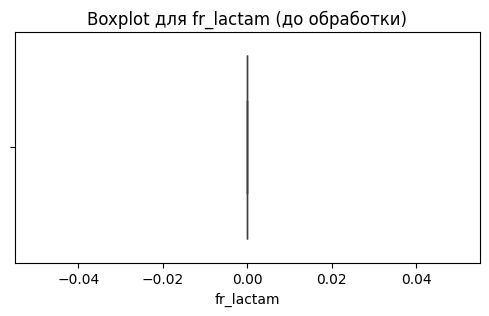

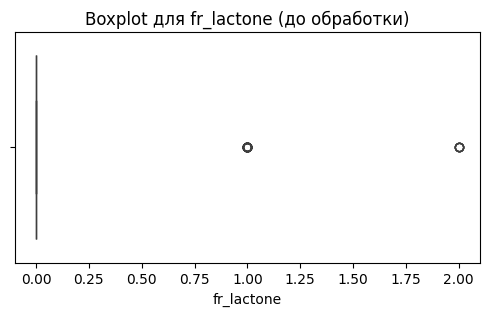

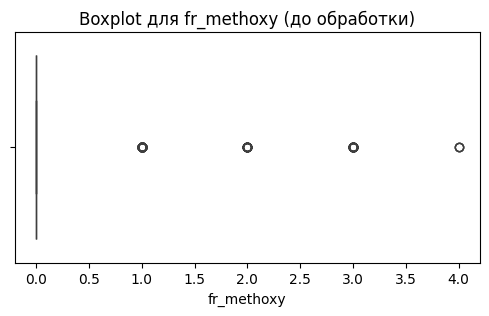

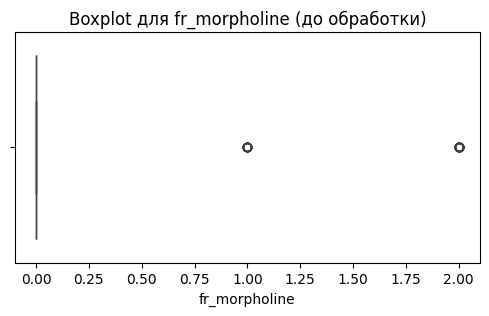

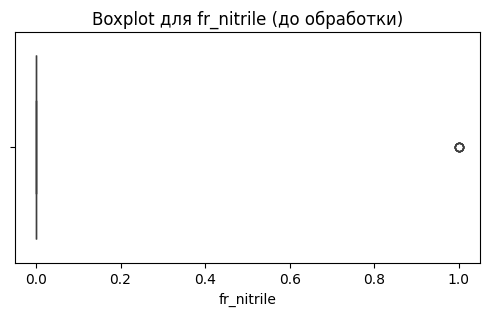

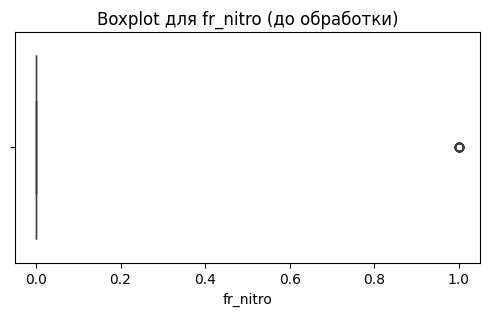

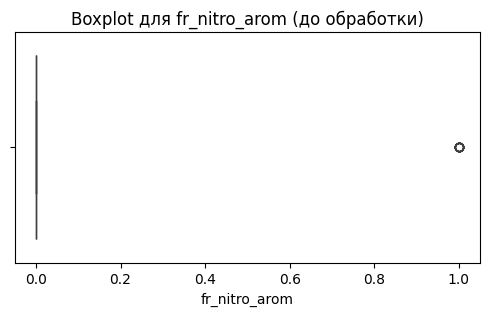

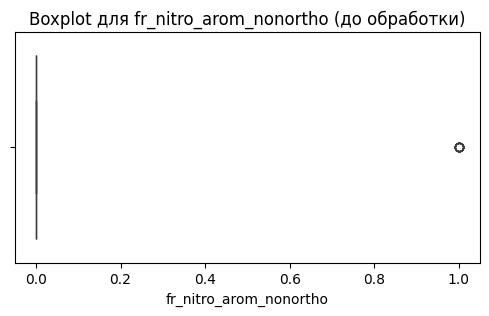

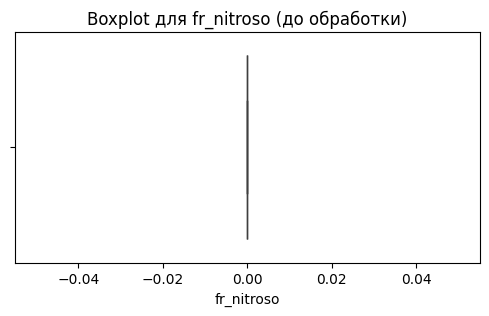

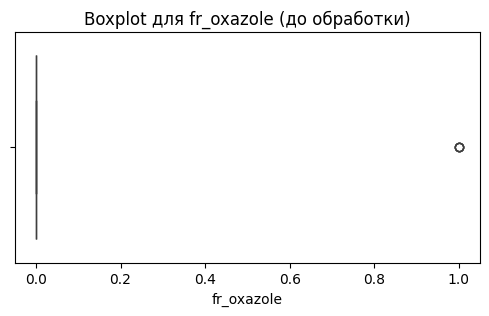

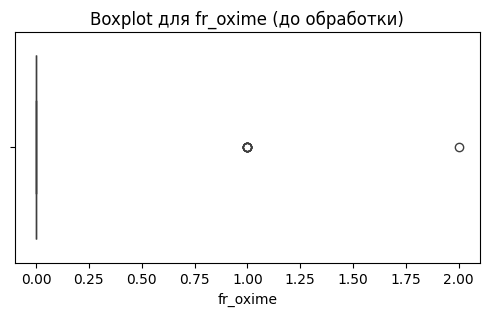

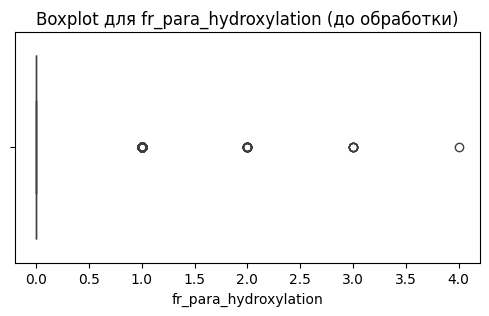

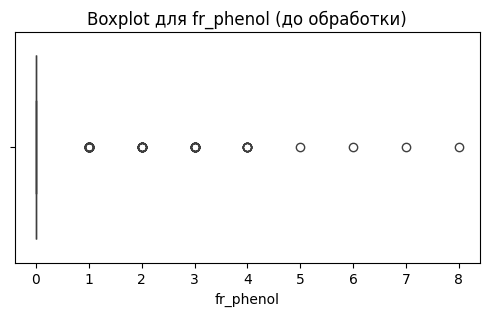

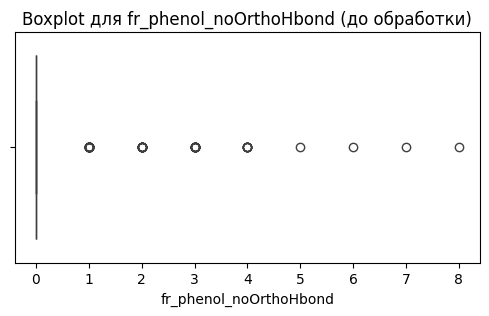

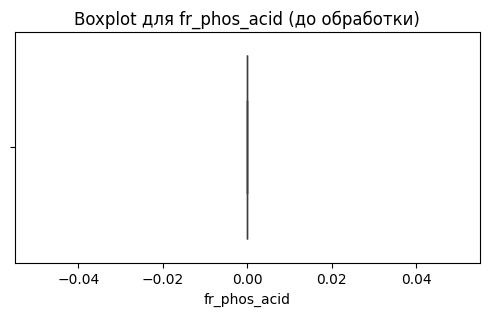

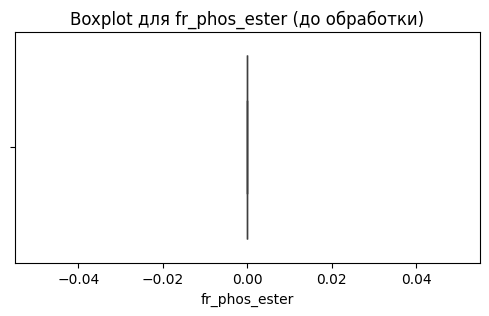

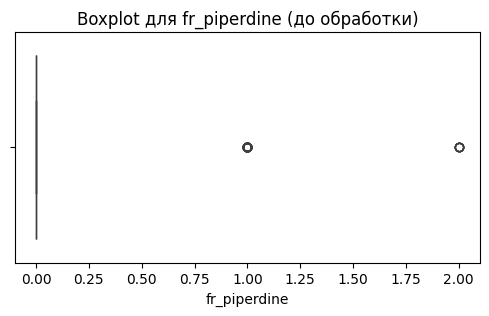

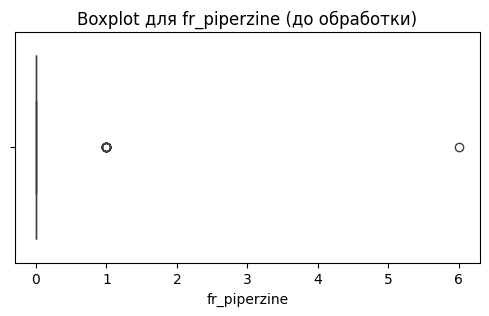

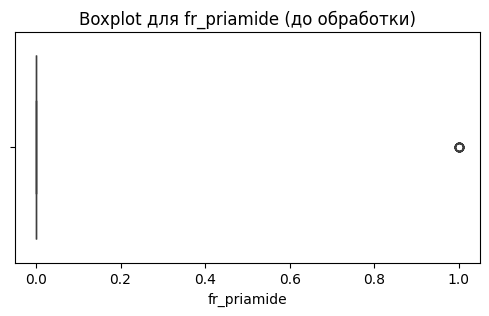

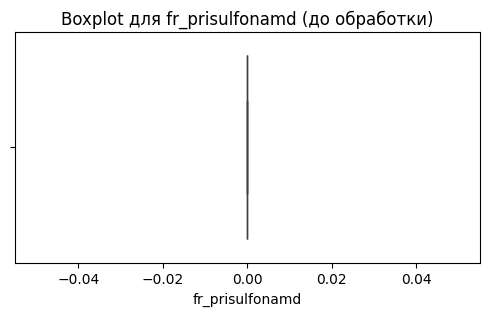

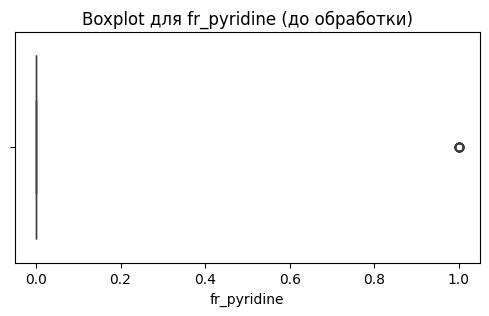

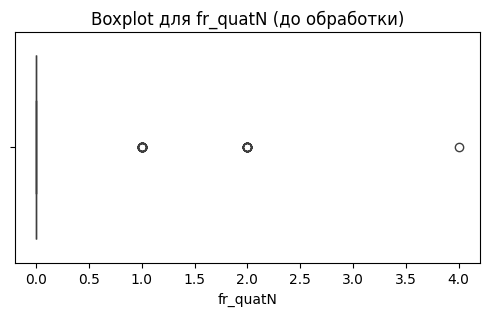

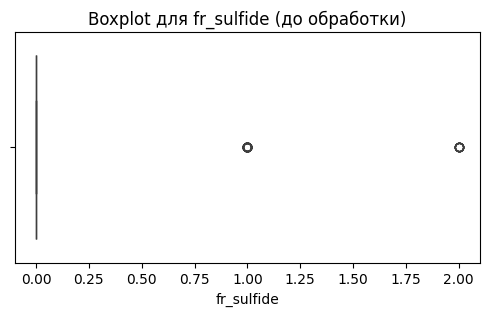

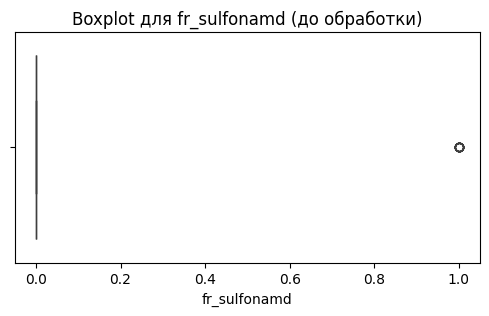

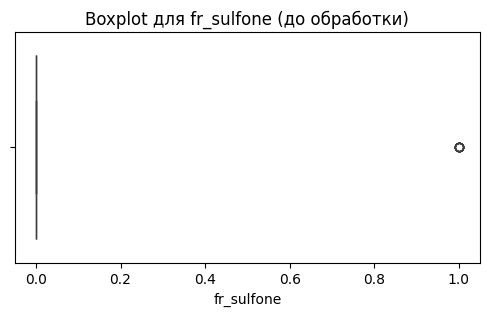

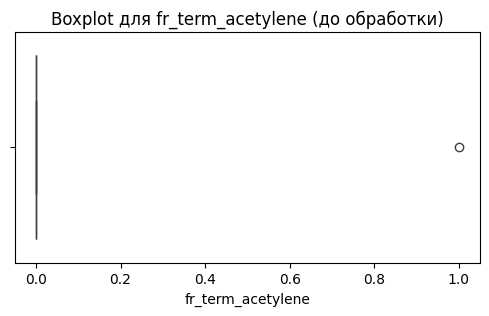

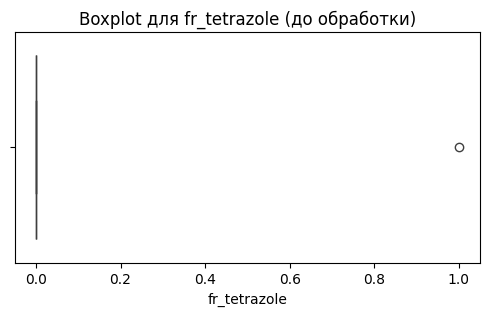

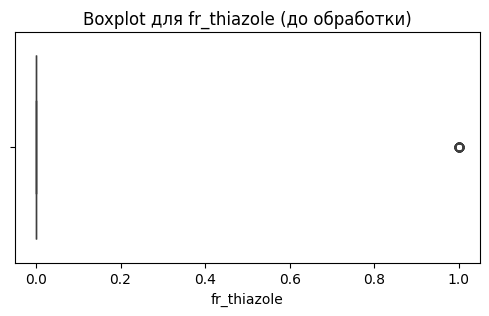

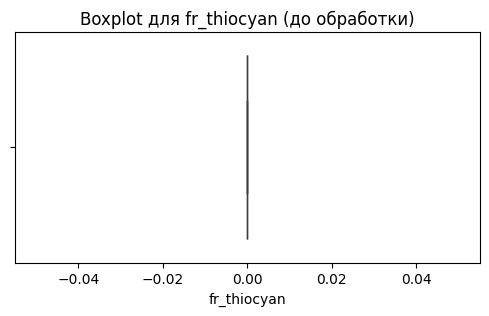

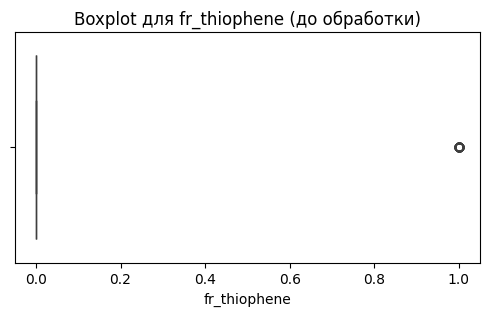

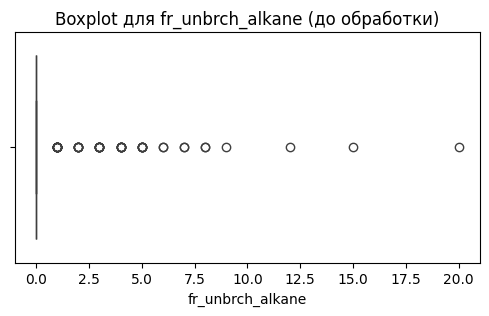

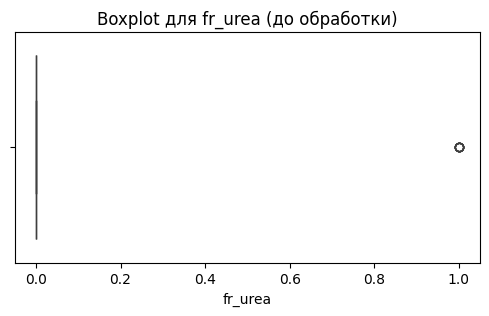

In [38]:
# Визуализация выбросов с помощью boxplot перед обработкой
for col in data:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[col])  # boxplot ("ящик с усами") показывает распределение данных и выбросы
    plt.title(f'Boxplot для {col} (до обработки)')
    plt.show()

### Метод межквартильного размаха (interquartile range) для определения выбросов

In [39]:
# Удаление выбросов методом IQR (межквартильный размах)
for col in data:
    Q1 = data[col].quantile(0.25)  # Первый квартиль (25-й процентиль)
    Q3 = data[col].quantile(0.75)  # Третий квартиль (75-й процентиль)
    IQR = Q3 - Q1  # Межквартильный размах
    
    # Границы для определения выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Замена выбросов на NaN
    data[col].where((data[col] >= lower_bound) & (data[col] <= upper_bound), other=np.nan, inplace=True)

In [40]:
# Заполнение пропусков (например, медианой)
data.fillna(data.median(), inplace=True)

In [54]:
# Удаление признаков с низкой дисперсией
selector = VarianceThreshold(threshold=0.1)  # Удалить признаки с дисперсией < 0.1
data_reduced = selector.fit_transform(data)

In [55]:
# Получение сохранившихся столбцов (если data — DataFrame)
mask = selector.get_support()
selected_columns = data.columns[mask]
data_reduced = data[selected_columns]

In [56]:
selected_columns.tolist()

['Unnamed: 0',
 'IC50, mM',
 'CC50, mM',
 'SI',
 'MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinEStateIndex',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'BCUT2D_MWHI',
 'BCUT2D_MRHI',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'SlogP_VSA8',
 'TPSA',
 'EState_VSA1',
 'EState_VSA10',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'E

In [57]:
data_reduced.shape

(1001, 111)

In [58]:
# Разделение данных на признаки (X) и целевую переменную (y)
# Предполагаем, что целевая переменная называется 'target'
X = data_reduced.drop('SI', axis=1)
y = data_reduced['SI']

In [59]:
# Масштабирование признаков (опционально, но полезно для некоторых моделей)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [60]:
# Оценка важности признаков для регрессии или классификации
# Определяем тип задачи (регрессия или классификация)
if y.dtype == 'object' or len(y.unique()) < 10:  # Классификация
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    problem_type = 'classification'
else:  # Регрессия
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    problem_type = 'regression'

model.fit(X_scaled, y)

RandomForestRegressor(random_state=42)

In [61]:
# Получение важности признаков
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

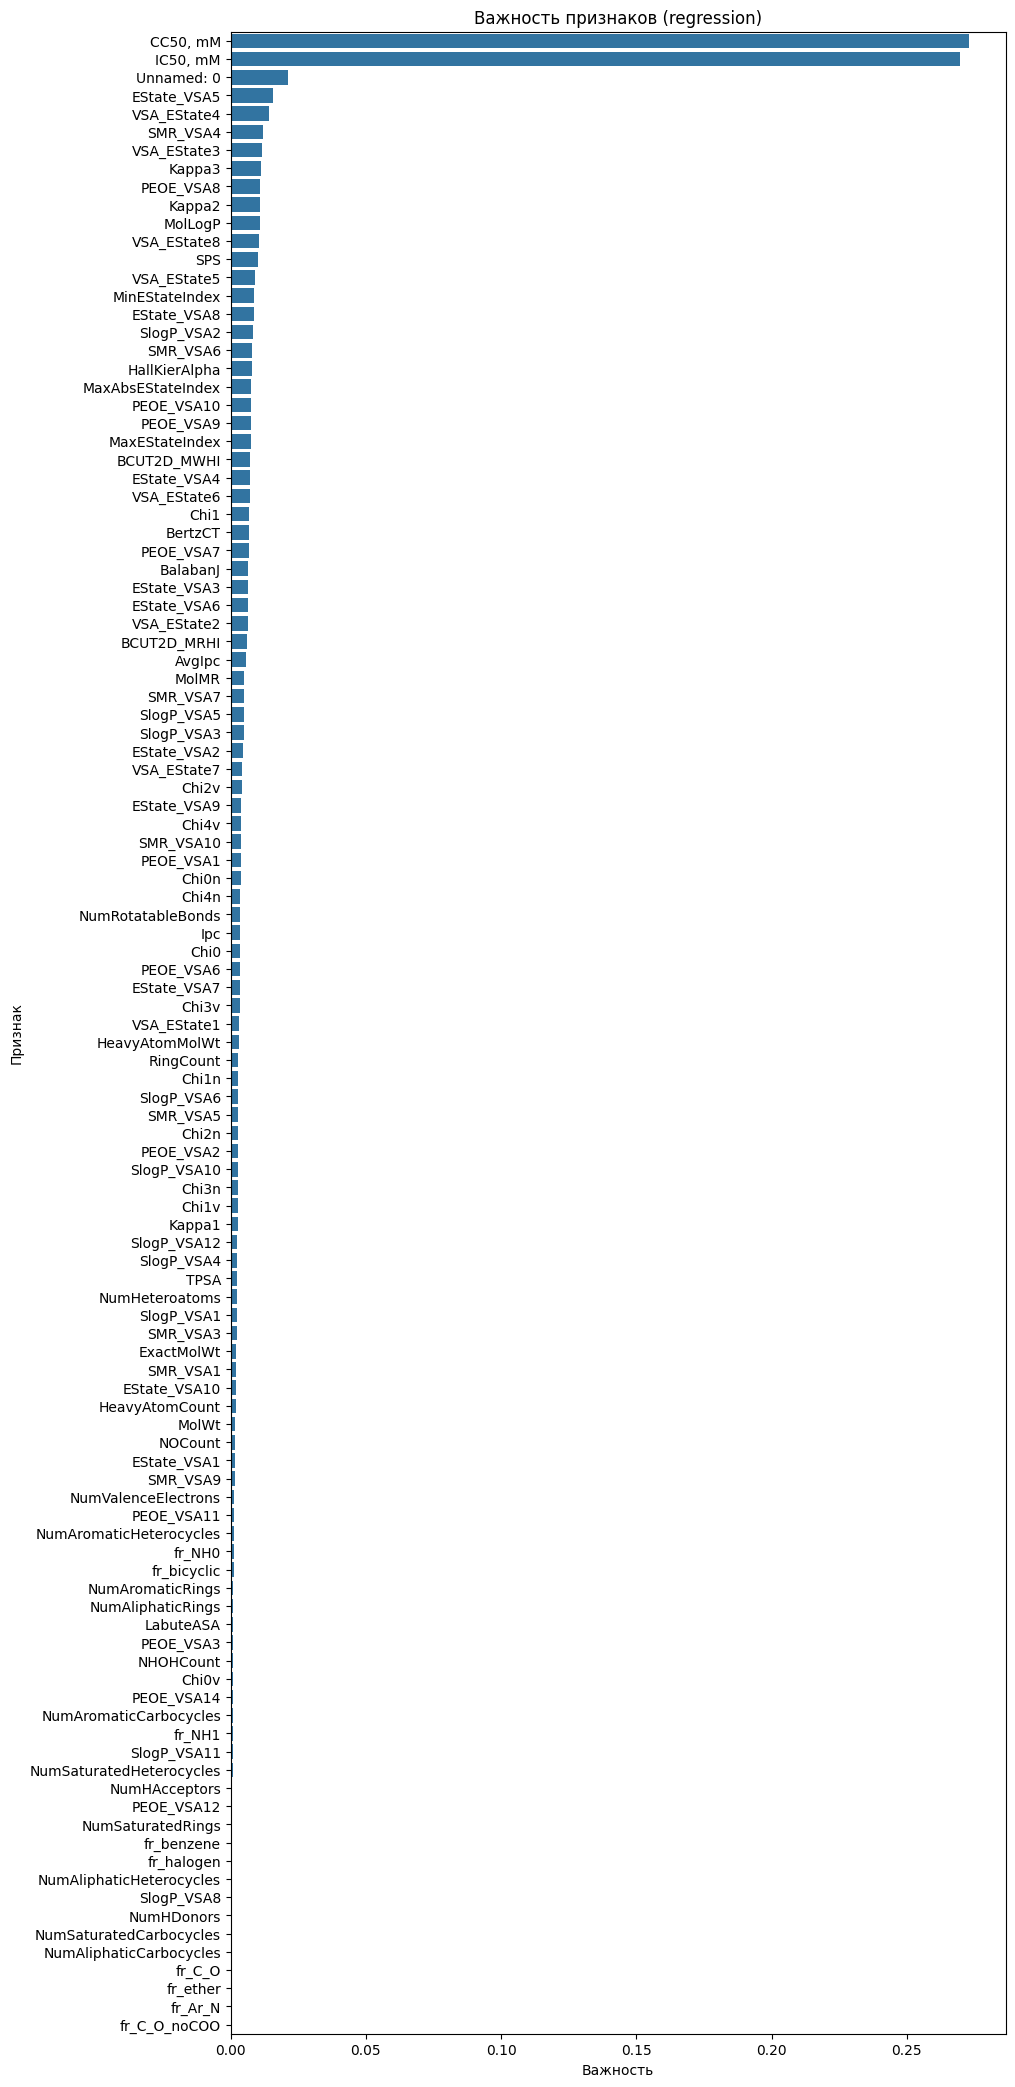

In [63]:
# Визуализация важности признаков
plt.figure(figsize=(10, 26))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title(f'Важность признаков ({problem_type})')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

In [65]:
# Выбор значимых признаков (например, топ-10 или важность > 0.01)
threshold = 0.01  # Порог важности
significant_features = feature_importance[feature_importance['Importance'] > threshold]['Feature'].tolist()

In [66]:
# Альтернативный способ: автоматический выбор признаков с помощью SelectFromModel
selector = SelectFromModel(model, threshold=threshold, prefit=True)
X_selected = selector.transform(X_scaled)
selected_features = X.columns[selector.get_support()]

In [67]:
print(f"Значимые признаки ({problem_type}):", selected_features.tolist())

Значимые признаки (regression): ['Unnamed: 0', 'IC50, mM', 'CC50, mM', 'SPS', 'Kappa2', 'Kappa3', 'PEOE_VSA8', 'SMR_VSA4', 'EState_VSA5', 'VSA_EState3', 'VSA_EState4', 'VSA_EState8', 'MolLogP']


In [70]:
# Оставляем только те признаки, которые есть в data_reduced
valid_features = [feat for feat in selected_features if feat in data_reduced.columns]

In [71]:
if 'SI' not in data_reduced.columns:
    print("Столбец 'SI' отсутствует в данных")

In [72]:
data_final = data_reduced[valid_features + ['SI']] if 'SI' in data_reduced.columns else data_reduced[valid_features]
print("Финальный набор данных:", data_final.columns.tolist())


Финальный набор данных: ['Unnamed: 0', 'IC50, mM', 'CC50, mM', 'SPS', 'Kappa2', 'Kappa3', 'PEOE_VSA8', 'SMR_VSA4', 'EState_VSA5', 'VSA_EState3', 'VSA_EState4', 'VSA_EState8', 'MolLogP', 'SI']


In [73]:
data_final.head()

Unnamed: 0    IC50, mM    CC50, mM        SPS    Kappa2    Kappa3  \
0           0    6.239374  175.482376  42.928570  6.947535  2.868737   
1           1    0.771831    5.402819  45.214287  7.257648  3.027177   
2           2  223.808777  161.142319  42.187500  7.709373  3.470070   
3           3    1.705624  107.855652  41.862068  7.485204  3.263848   
4           4  107.131531  139.270996  36.514286  7.639211  3.345855   

   PEOE_VSA8   SMR_VSA4  EState_VSA5  VSA_EState3  VSA_EState4  VSA_EState8  \
0  35.342865  43.480583    12.132734     0.000000     4.807589    16.981087   
1  12.083682  33.495773    12.132734     7.922833     2.153503     4.160013   
2  23.671625  33.495773    12.132734     0.000000     2.184128     4.160013   
3  35.342865  43.480583    12.132734     0.000000     4.827852    17.012012   
4  22.253351  43.480583    12.132734     0.000000     9.071783    14.692318   

   MolLogP         SI  
0  7.12120  28.125000  
1  6.15560   7.000000  
2  7.12920   0.720000  
3  7.51130   3.044353  
4  3.43375   1.300000

In [74]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1001 non-null   int32  
 1   IC50, mM     1001 non-null   float32
 2   CC50, mM     1001 non-null   float32
 3   SPS          1001 non-null   float32
 4   Kappa2       1001 non-null   float32
 5   Kappa3       1001 non-null   float32
 6   PEOE_VSA8    1001 non-null   float32
 7   SMR_VSA4     1001 non-null   float32
 8   EState_VSA5  1001 non-null   float32
 9   VSA_EState3  1001 non-null   float32
 10  VSA_EState4  1001 non-null   float32
 11  VSA_EState8  1001 non-null   float32
 12  MolLogP      1001 non-null   float32
 13  SI           1001 non-null   float32
dtypes: float32(13), int32(1)
memory usage: 54.9 KB


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убираем ненужный столбец
data = data_final.drop(columns=['Unnamed: 0'])

# Настройка стиля
plt.style.use('seaborn')
plt.figure(figsize=(16, 12))

# Построение гистограмм с KDE для каждого признака
for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
y_si

In [79]:
data_final.to_csv('data/data_cl.csv', index= False)